# Algorithm comparison 
This notebook contains the algorithm comparison for the measurements done with the DySpan 2017 testbed

N_FRAMES = 50
comparison is based on different aspects, such as:

* Dataset lenght
* complexity: different for each algorithm, made by playing around with the parameters that it has available
* Pre- and post- feature scaling

Aspects that are better explained in the thesis document contained in this same repository


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [9]:
import sys
sys.path.append("../python")
import setup_dataset

In [12]:
data, labels = setup_dataset.setup_simple_iterables("with_dc")

6
106890
106890


In [13]:
X_train, X_test, y_train, y_test = setup_dataset.slice_data(data, labels)

In [14]:
# Setting up various complexities for the different algorithms.
# Number of neighbors
knn_c = (2, 4, 10, 50)
# Maximum depth in a decision tree
dtc_c = (2, 5, 10, 50)
# complexities for the rbf kernel
svc_c = (1, 1000, 1000000)
# Number of estimators in the random forest classifier
rfc_c = (1, 10, 100, 1000, 10000, 100000)
# Number of parallel jobs (CPU)
rfc_jobs = (3, -2)
gpc_jobs = (3, -2)
# Number of iteration in the Gaussian Process Classifier
gpc_c = (20, 50, 100)

In [15]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
X_train_scaled, X_test_scaled = setup_dataset.scale_sliced_data(X_train, X_test, StandardScaler())

In [62]:
knn_list, knn_accs, knn_pred, knn_pred_times, knn_fit_times = \
setup_dataset.run_knn(X_train, X_test, y_train, y_test, knn_c)

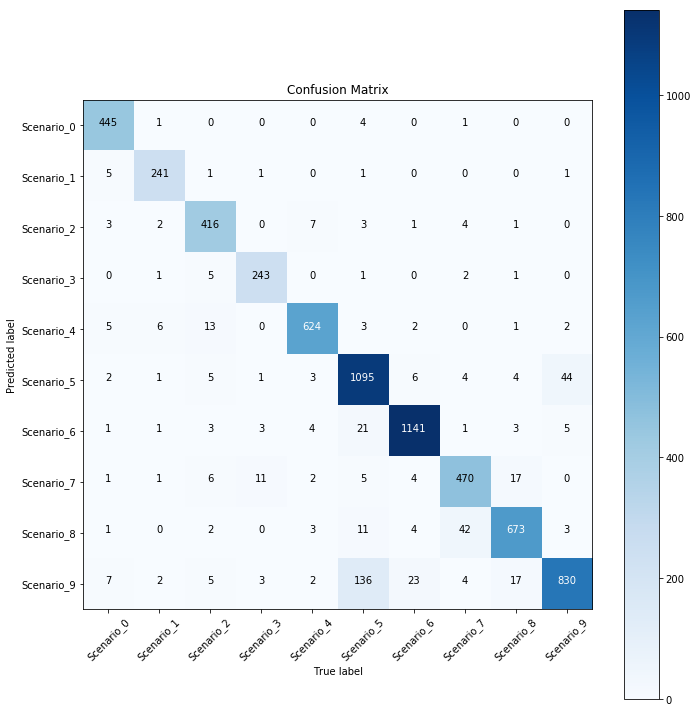

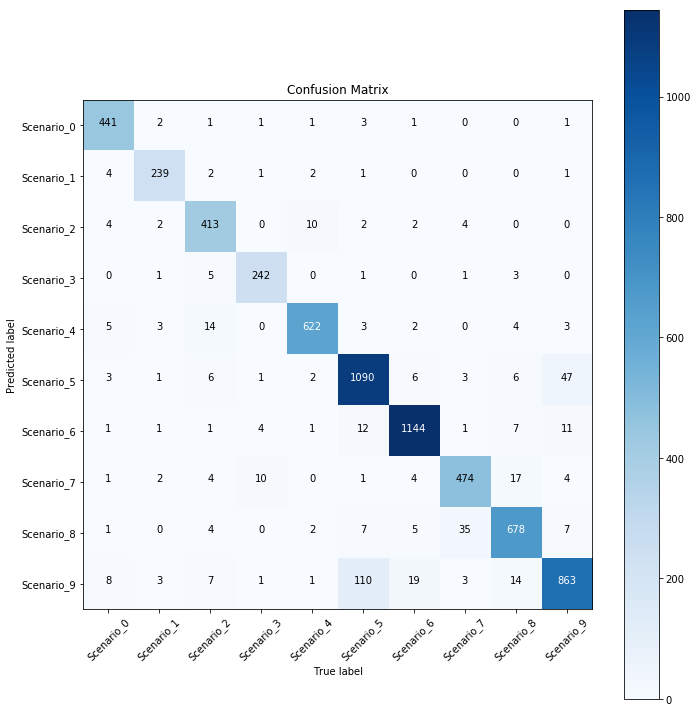

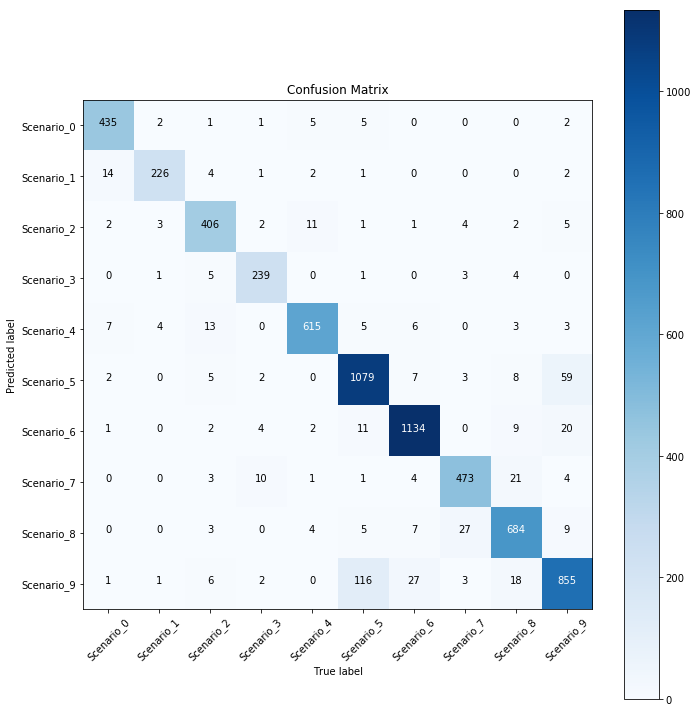

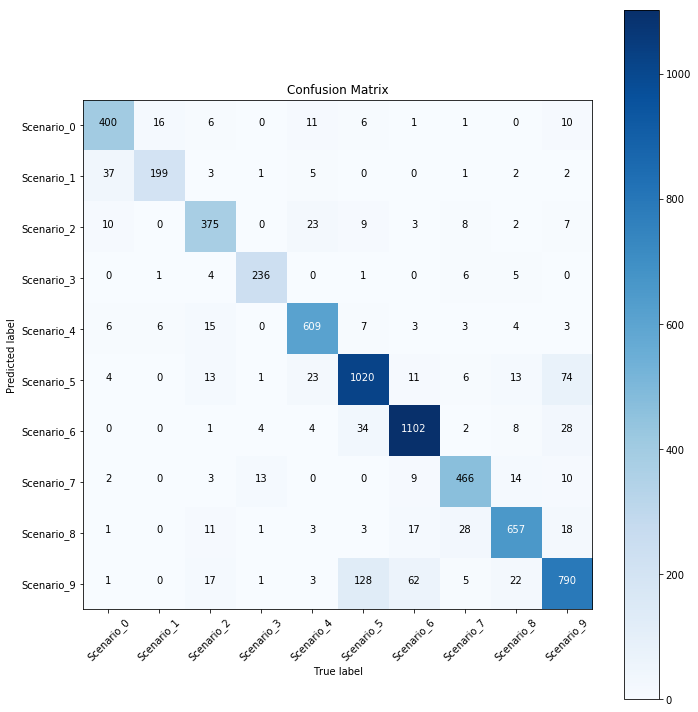

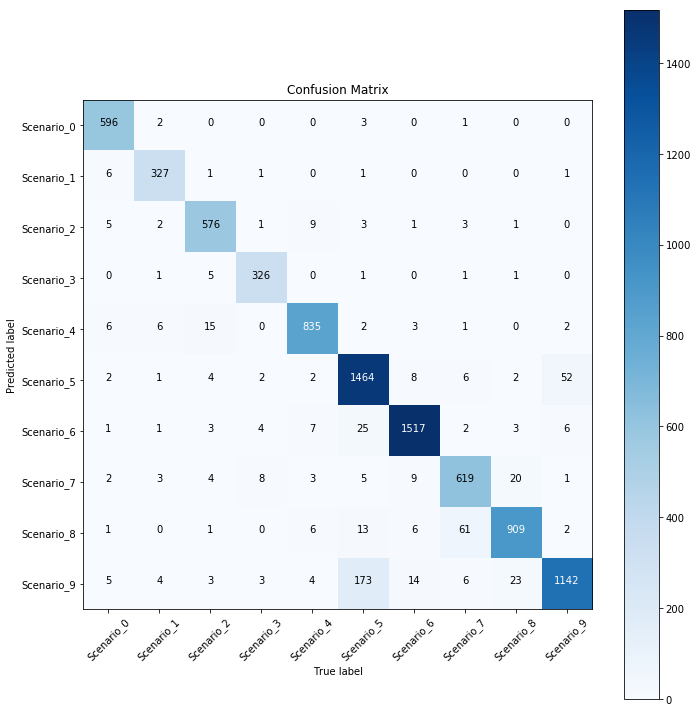

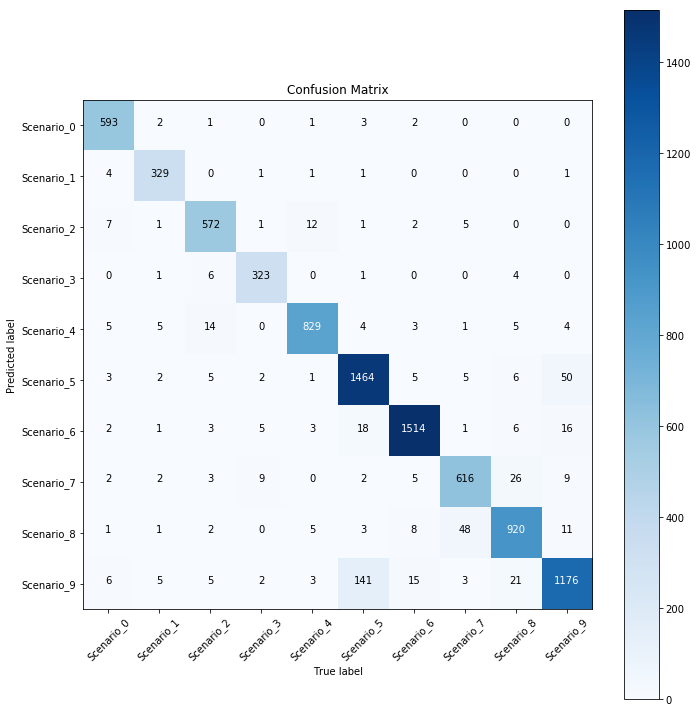

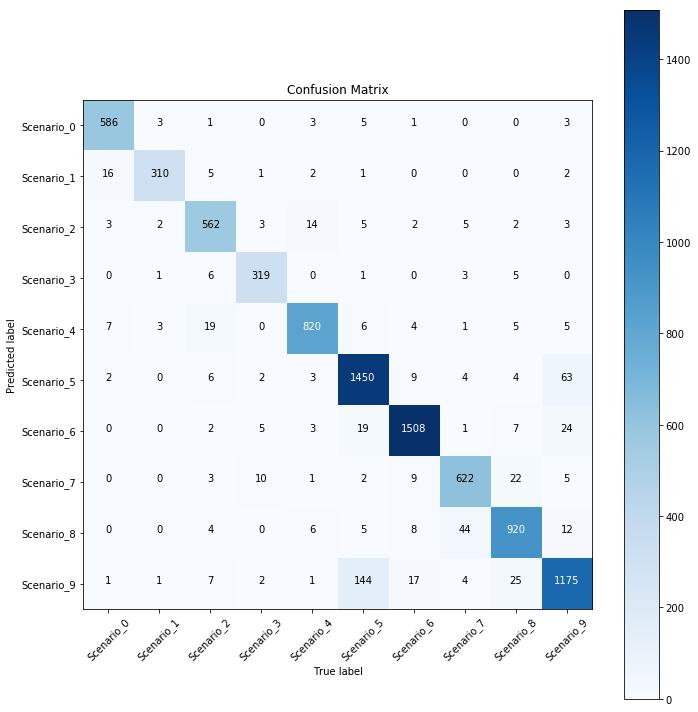

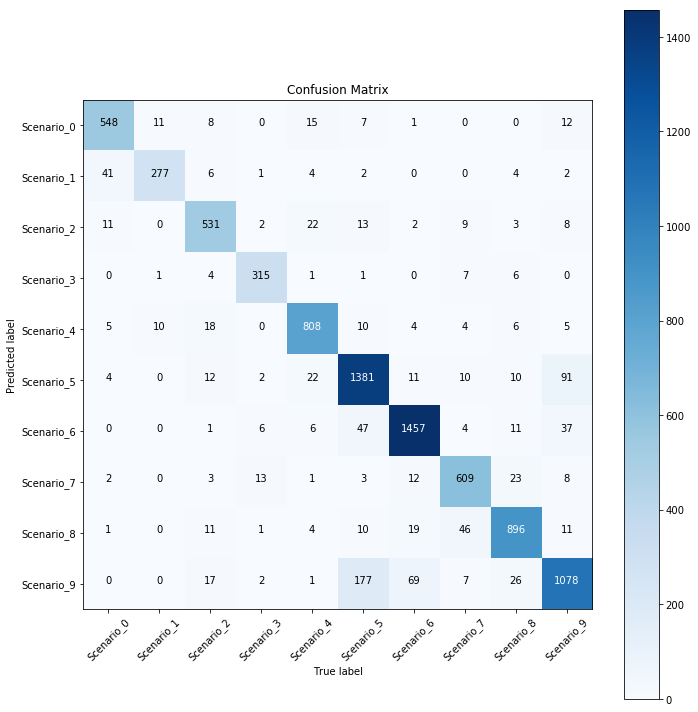

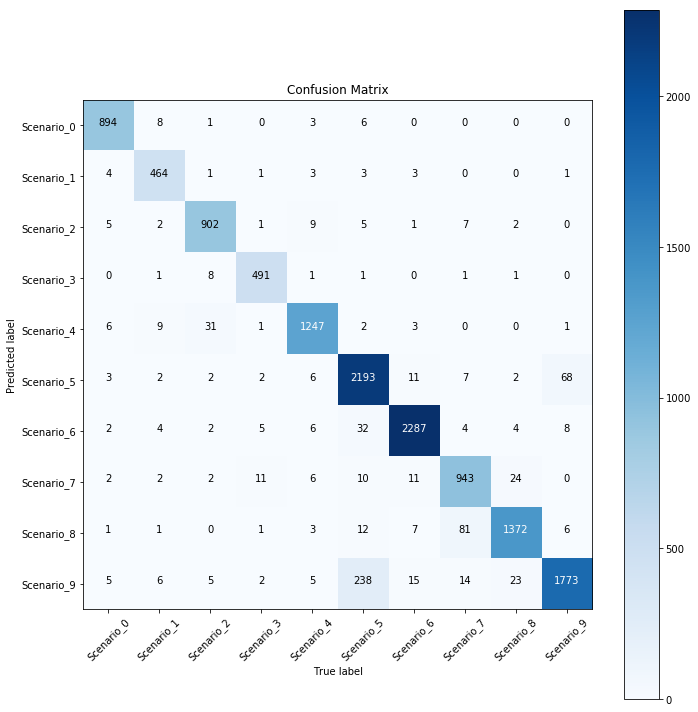

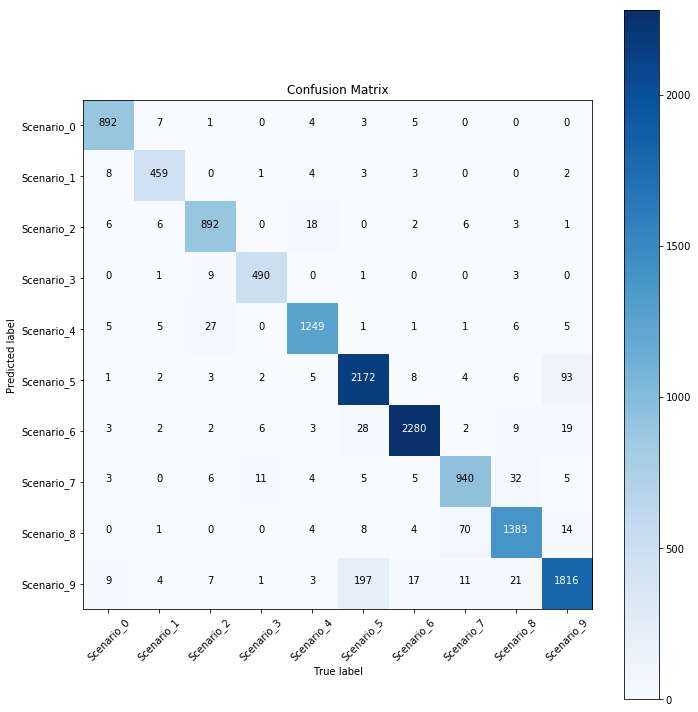

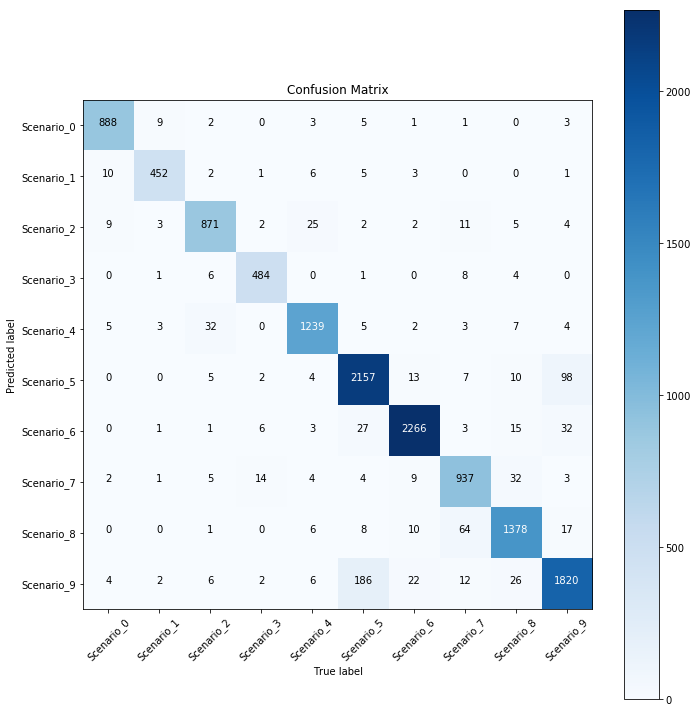

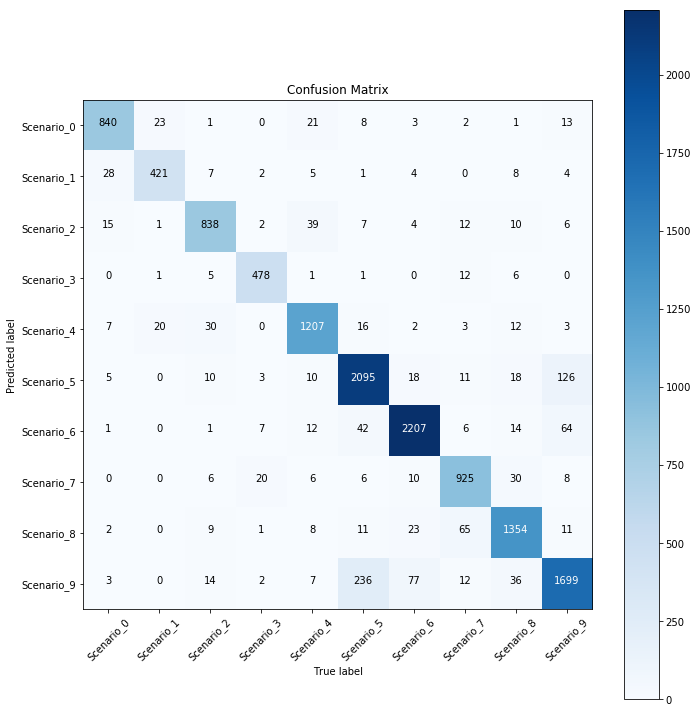

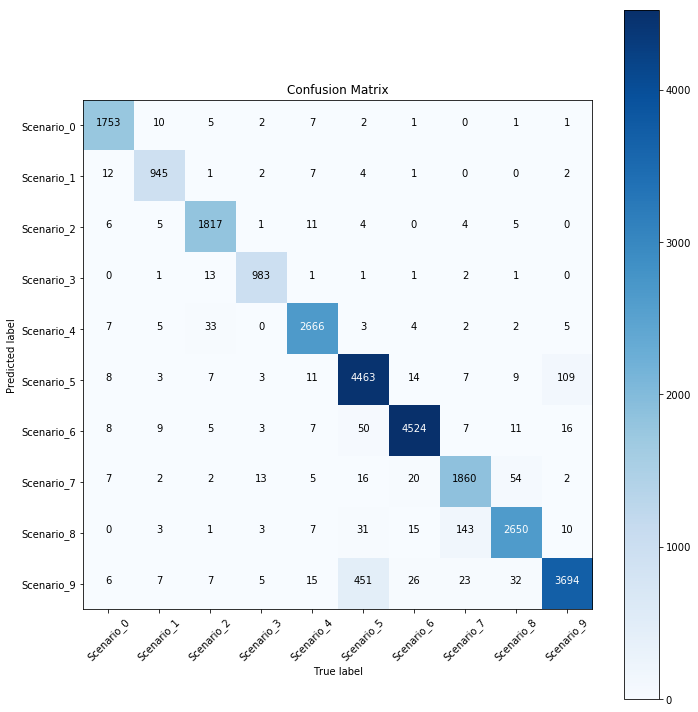

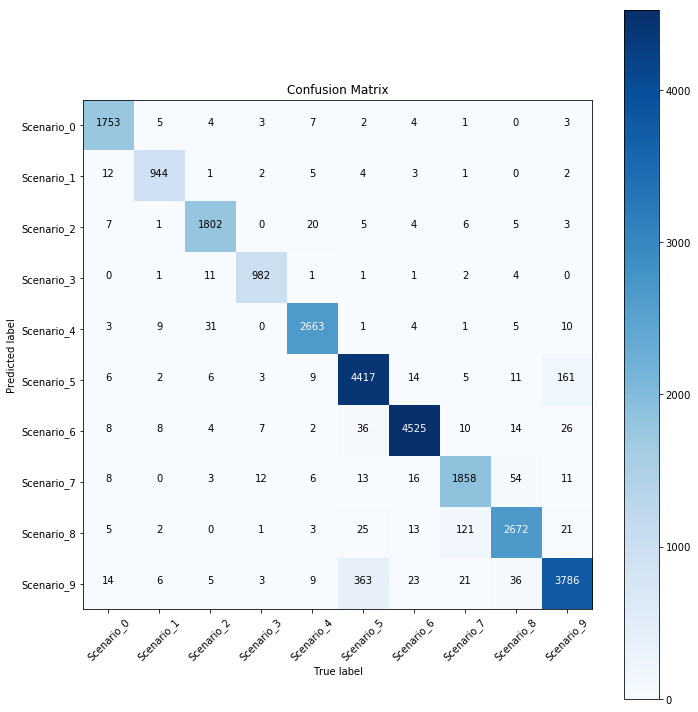

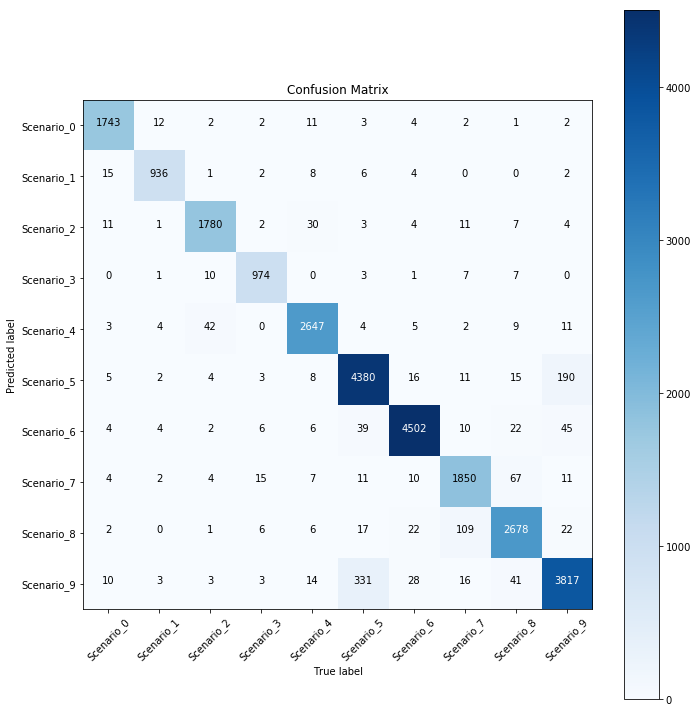

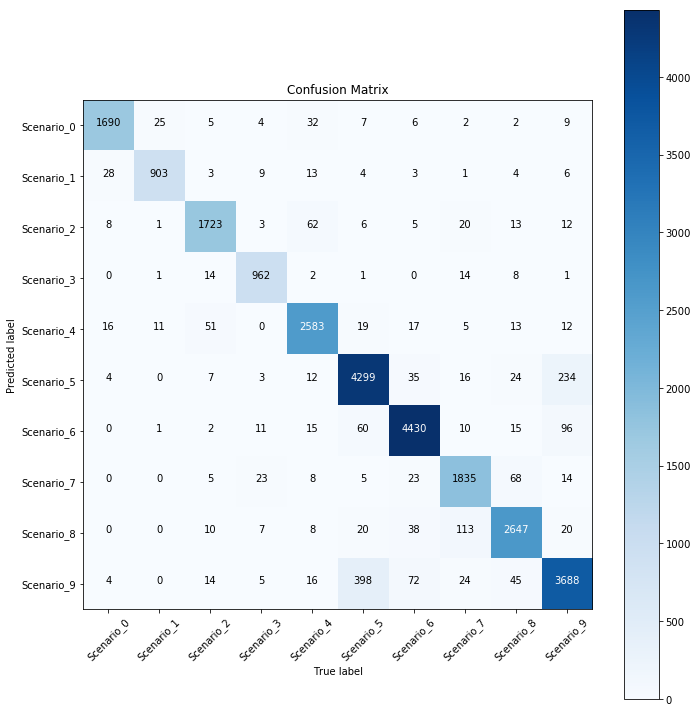

In [17]:
setup_dataset.compute_cm(y_test, knn_pred, knn_c)

In [63]:
knn_list_scaled, knn_accs_scaled, knn_pred_scaled, knn_pred_times_scaled, knn_fit_times_scaled =\
setup_dataset.run_knn(X_train_scaled, X_test_scaled, y_train, y_test, knn_c)

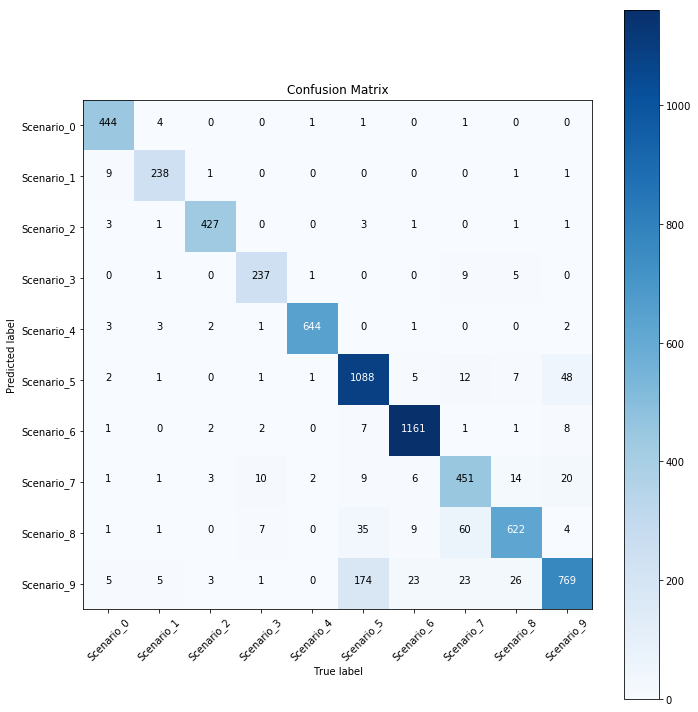

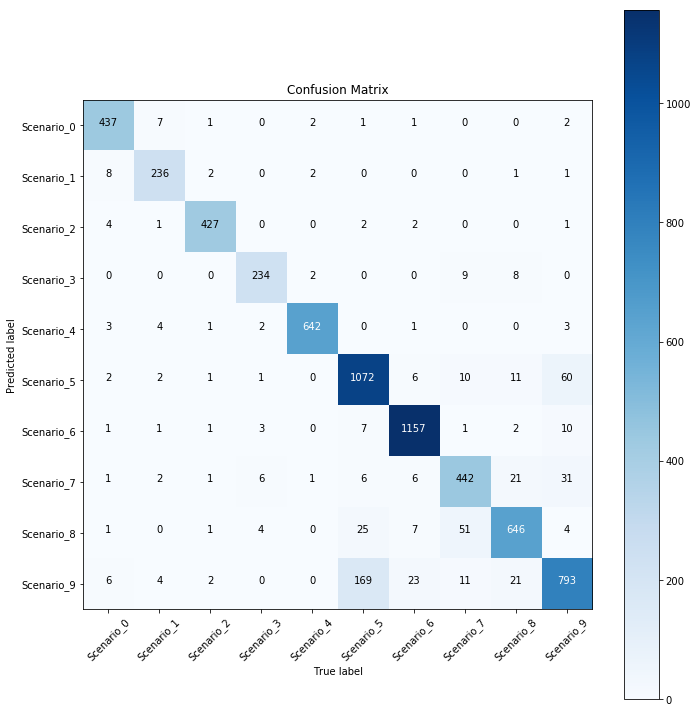

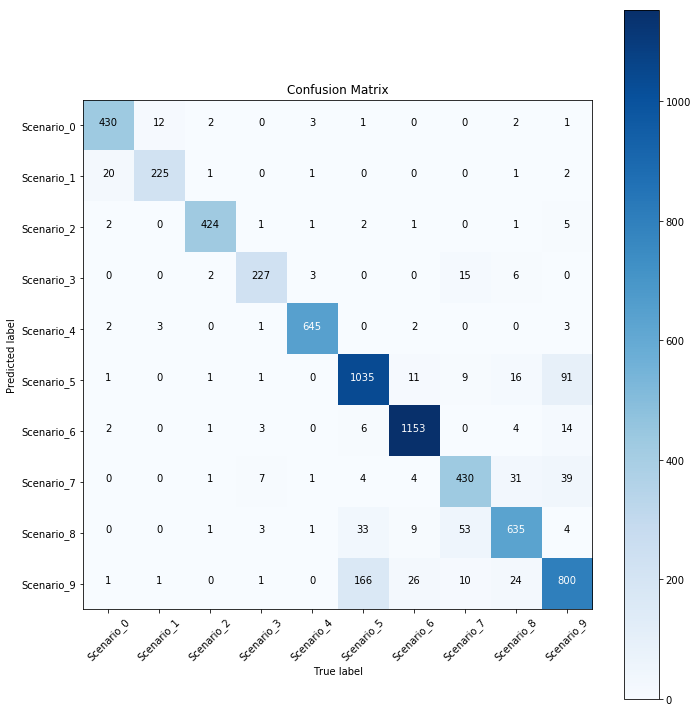

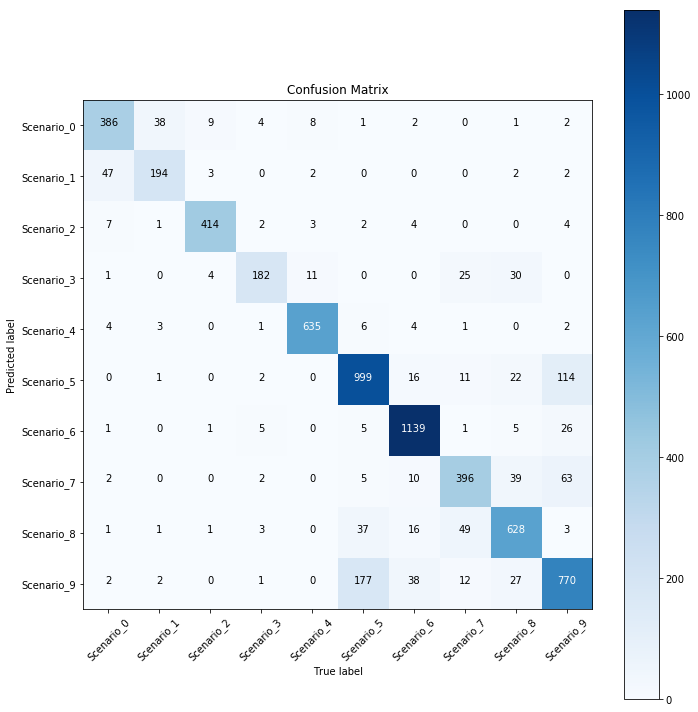

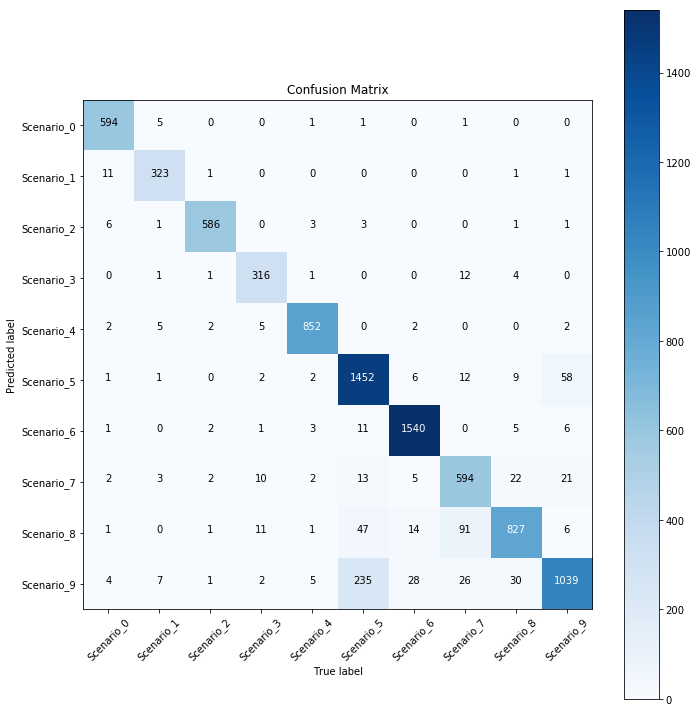

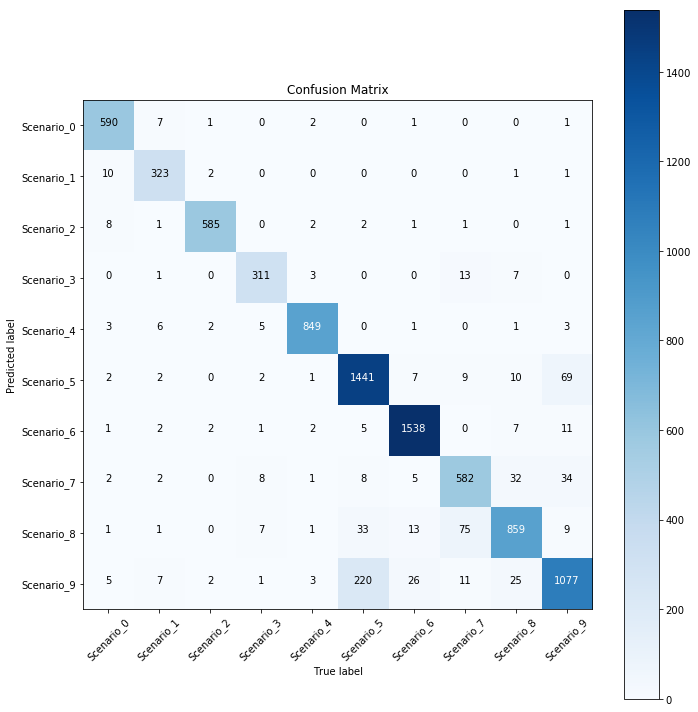

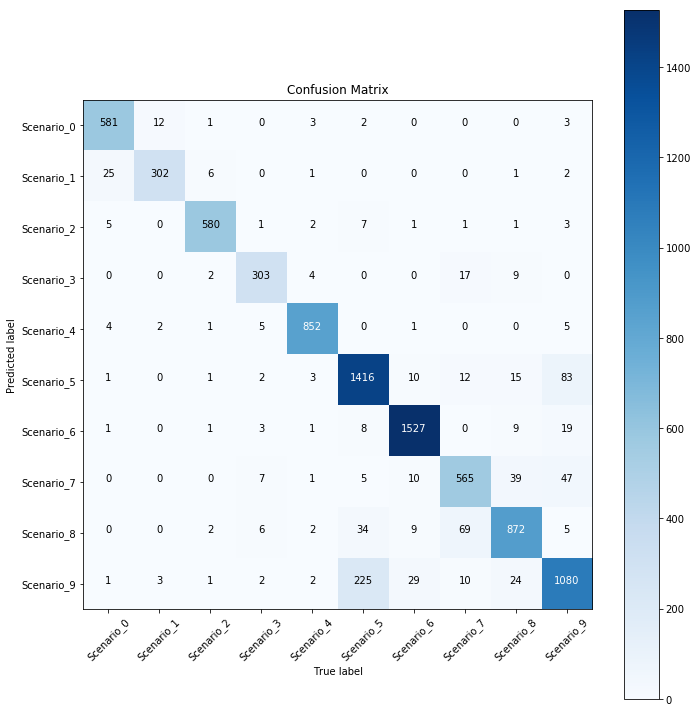

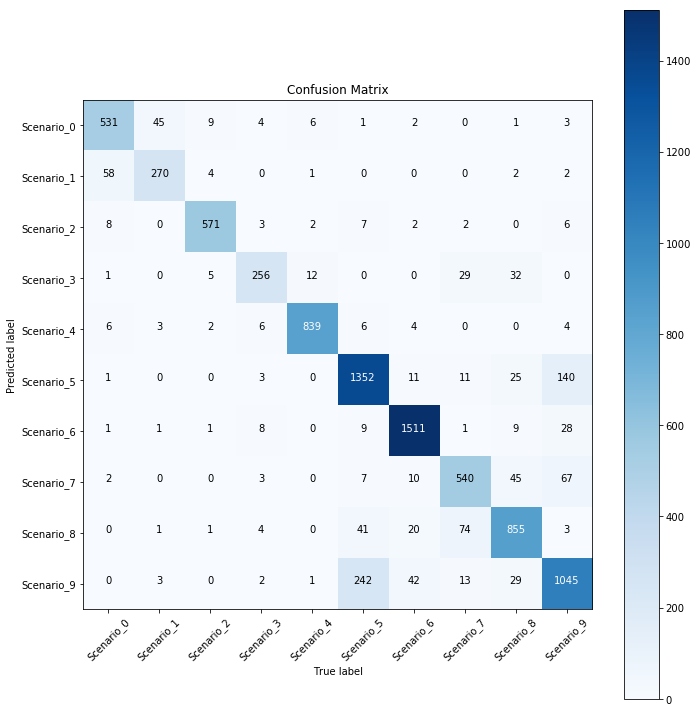

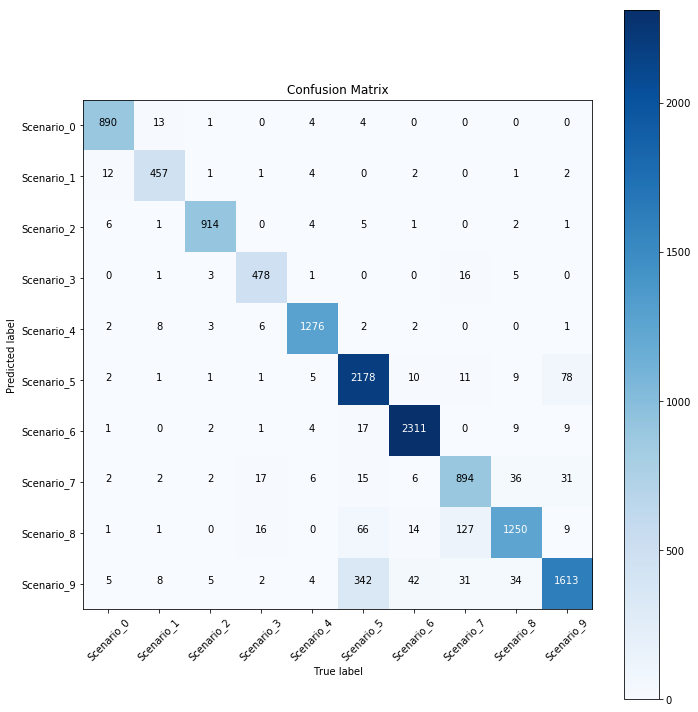

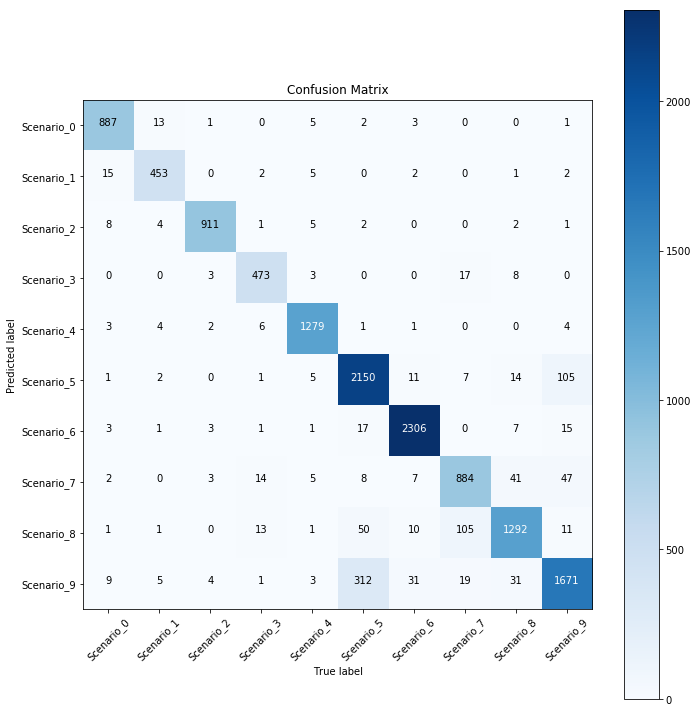

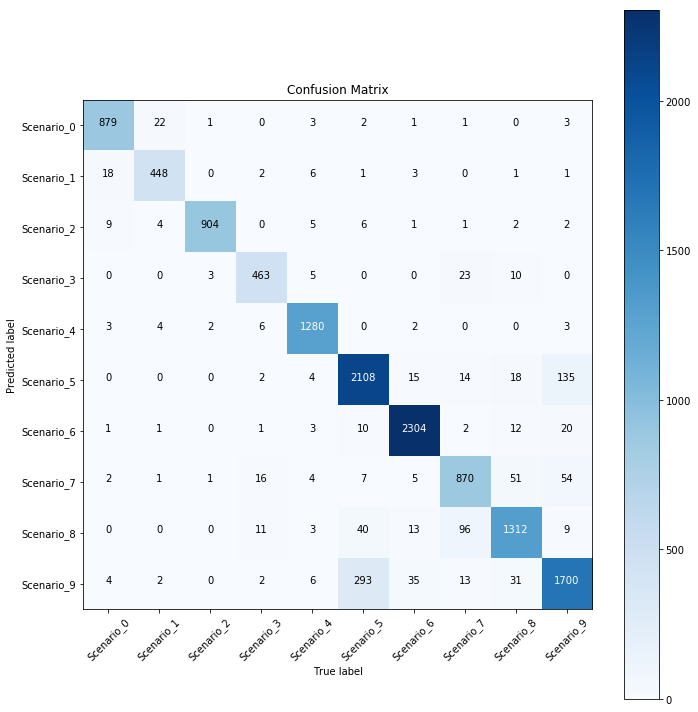

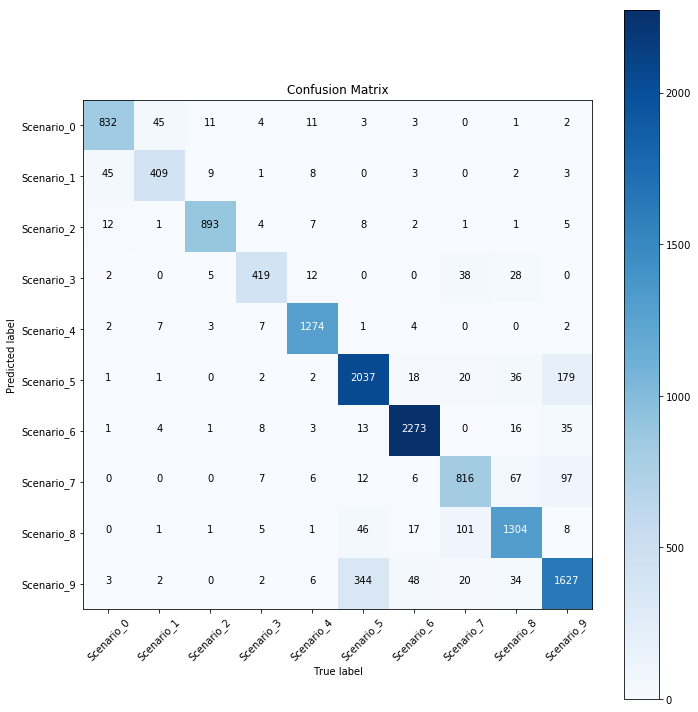

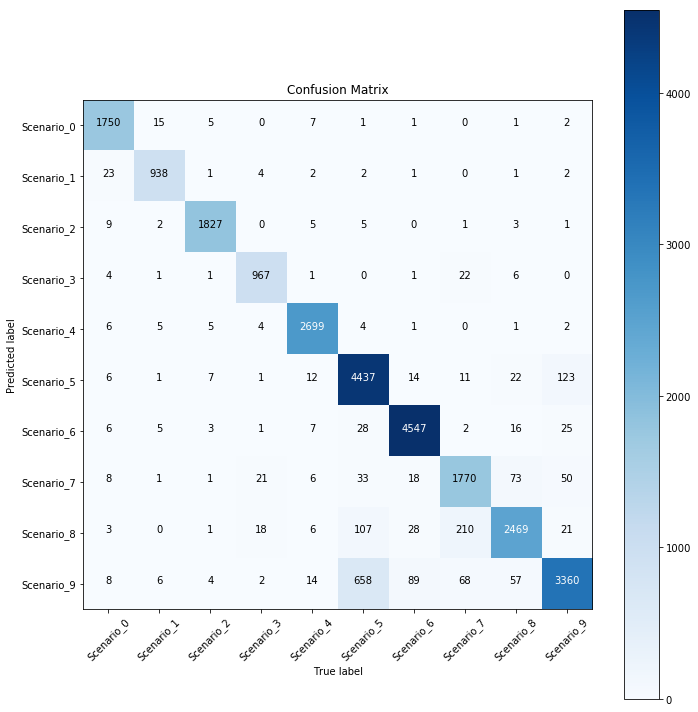

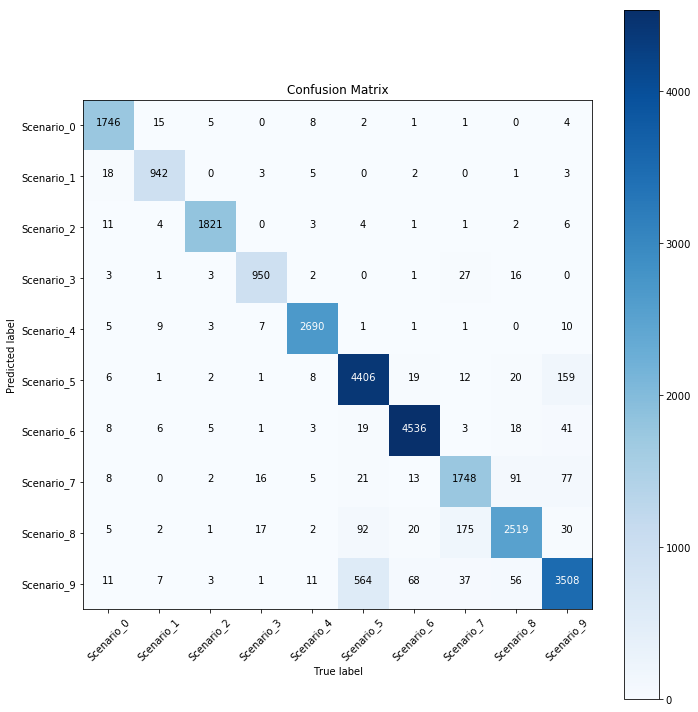

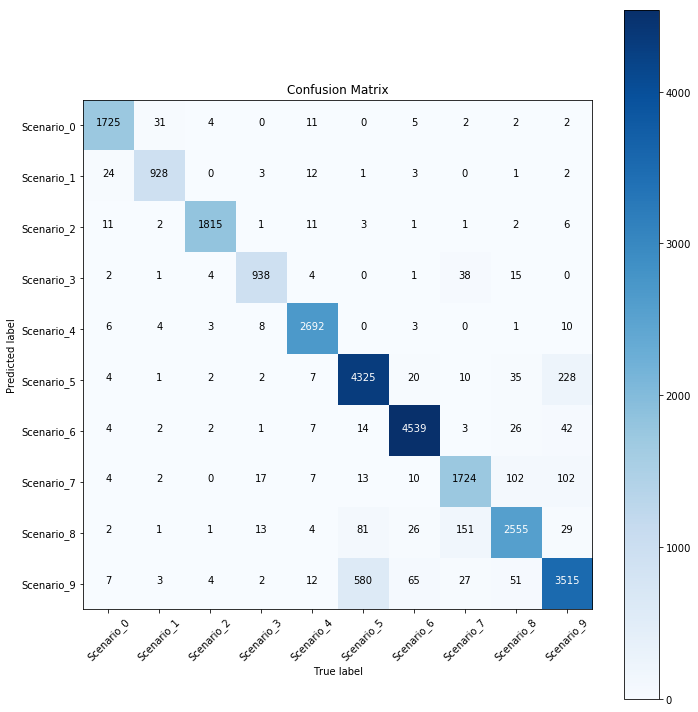

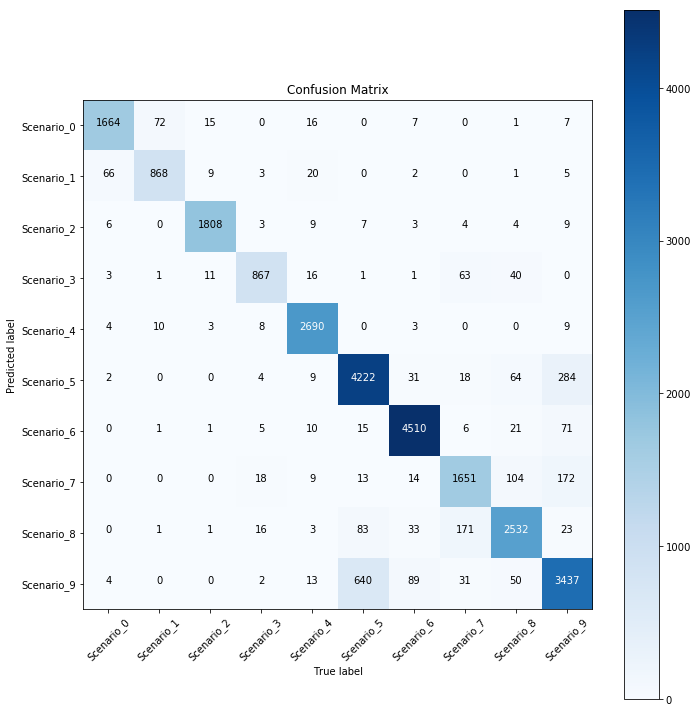

In [19]:
setup_dataset.compute_cm(y_test, knn_pred_scaled, knn_c)

In [20]:
for line in knn_accs :
    print(line)
print("====================") 
for line in knn_accs_scaled:
    print(line)

[0.92485029940119756, 0.92904191616766463, 0.92005988023952101, 0.87634730538922156]
[0.93308633658919948, 0.93589311777253847, 0.92870775794319071, 0.88694285393510719]
[0.94049846568370632, 0.94102237856447868, 0.93495995808696952, 0.90292642766260012]
[0.94880814279833847, 0.95056692736593951, 0.94701193728249078, 0.92654267859147554]
[0.91032934131736531, 0.91107784431137728, 0.89880239520958083, 0.85973053892215567]
[0.91197934209049059, 0.91557202200516452, 0.90692713596048047, 0.8723475917817447]
[0.91767083302148045, 0.92103884439787442, 0.91819474590225281, 0.88945438215702421]
[0.92669236238446284, 0.93050929910563929, 0.92639299479848825, 0.90742057403734611]


In [64]:
dtc_list, dtc_accs, dtc_pred, dtc_pred_times, dtc_fit_times = \
setup_dataset.run_decision_tree(X_train, X_test, y_train, y_test, dtc_c)

In [23]:
dtc_list_scaled, dtc_accs_scaled, dtc_pred_scaled, dtc_pred_times_scaled, dtc_fit_times_scaled = \
setup_dataset.run_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test, dtc_c)

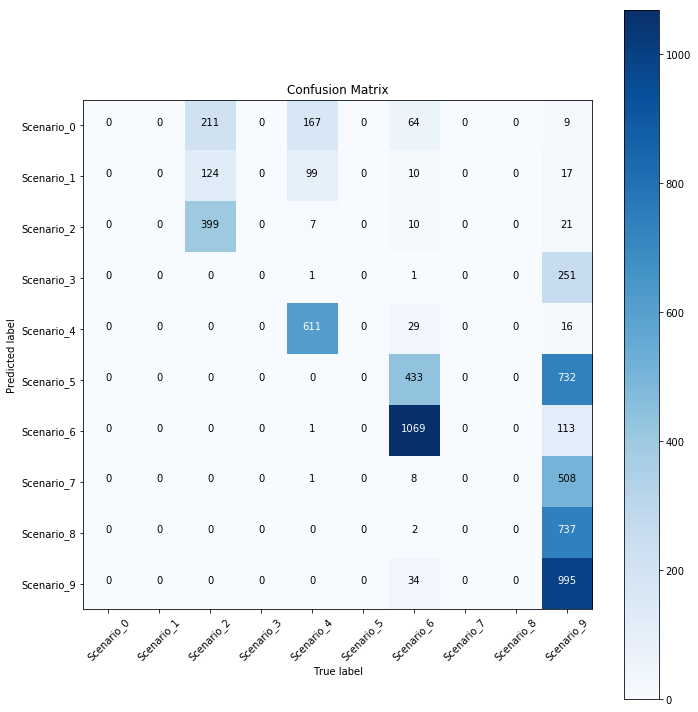

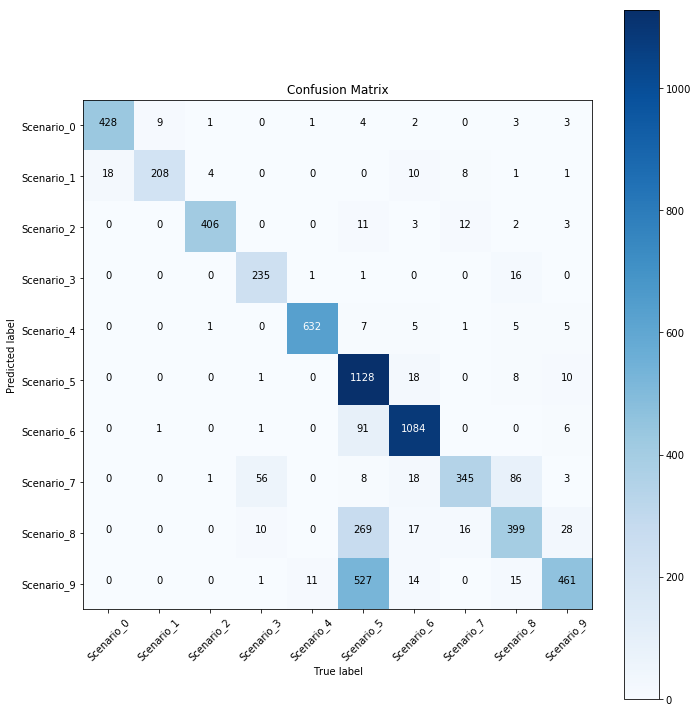

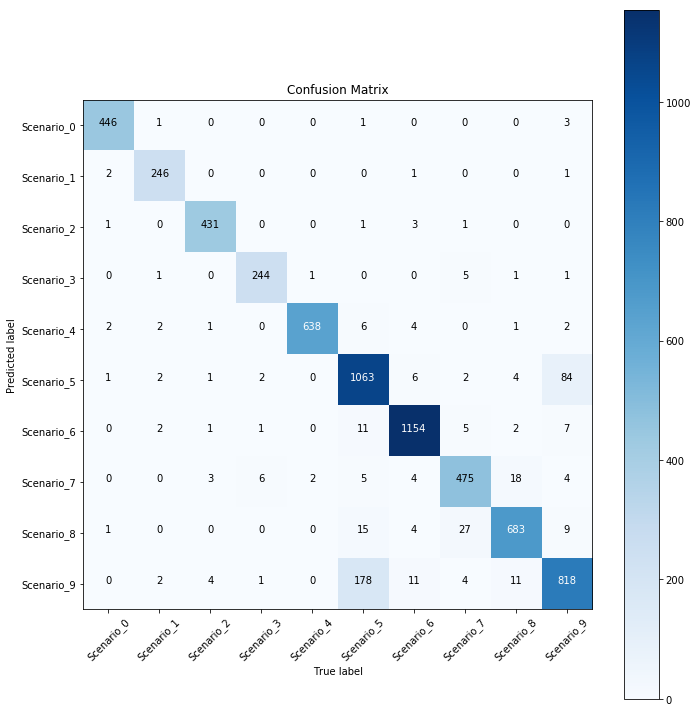

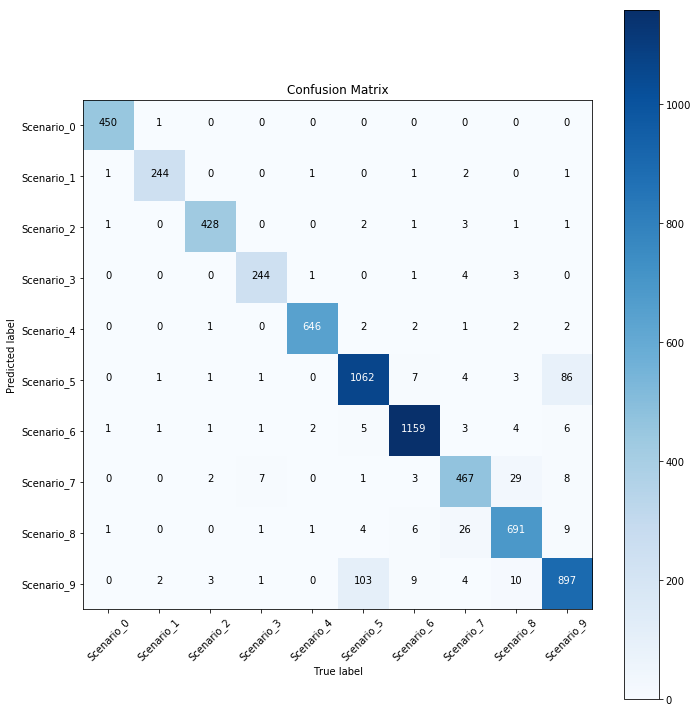

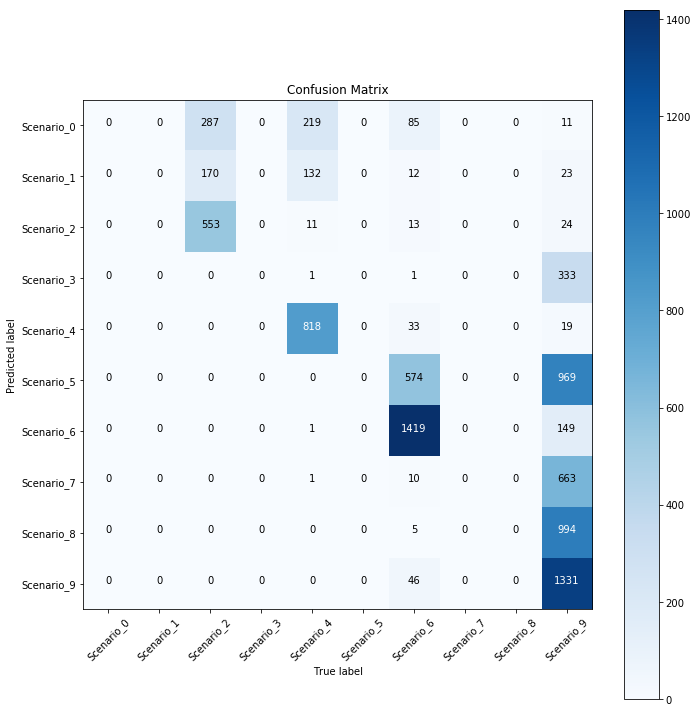

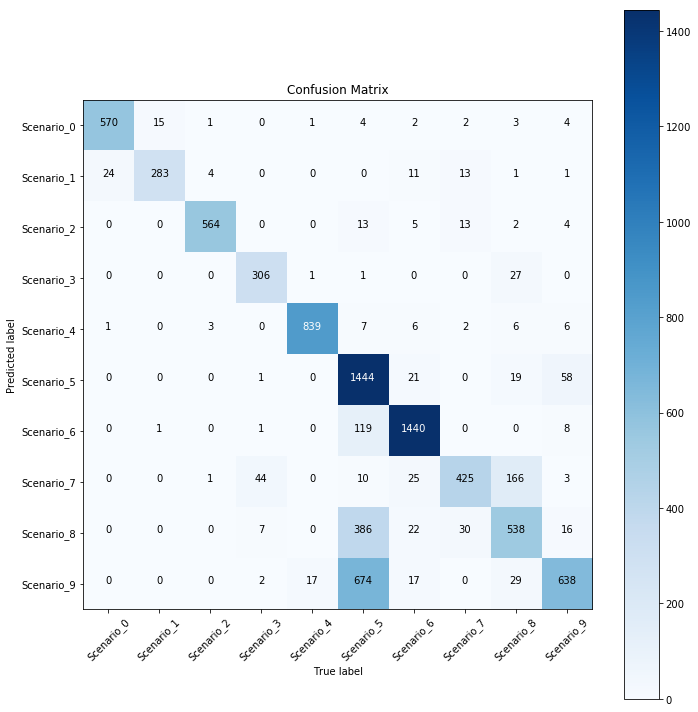

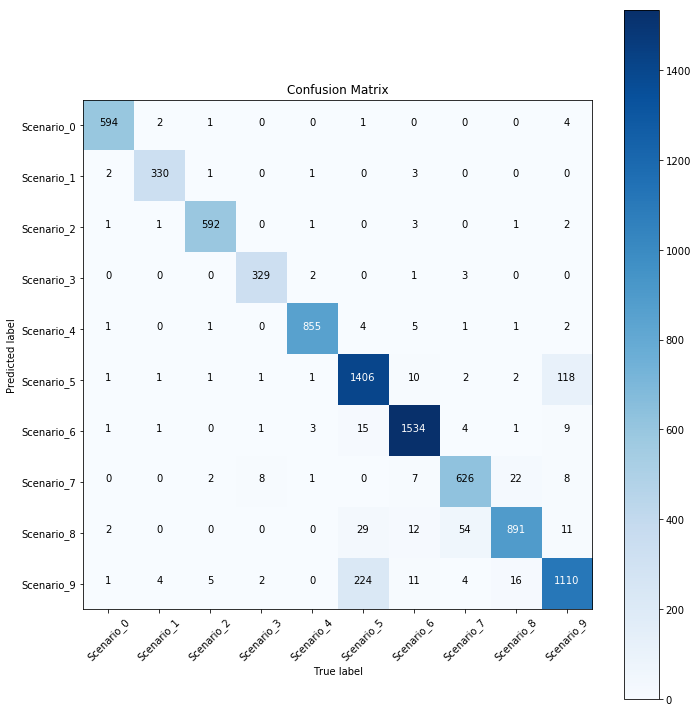

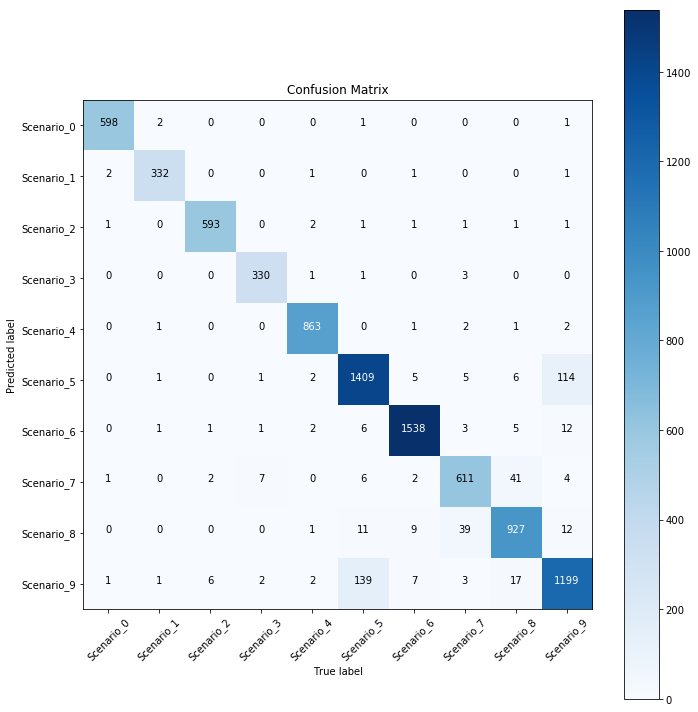

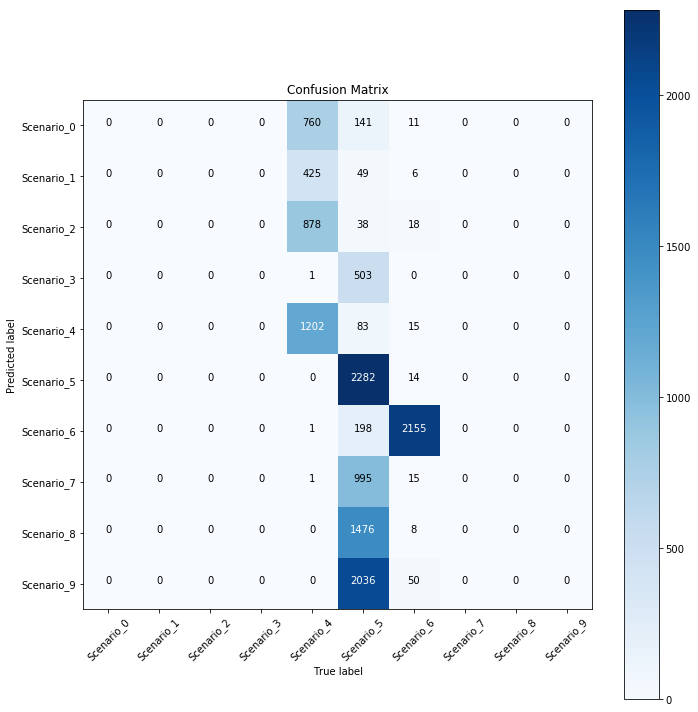

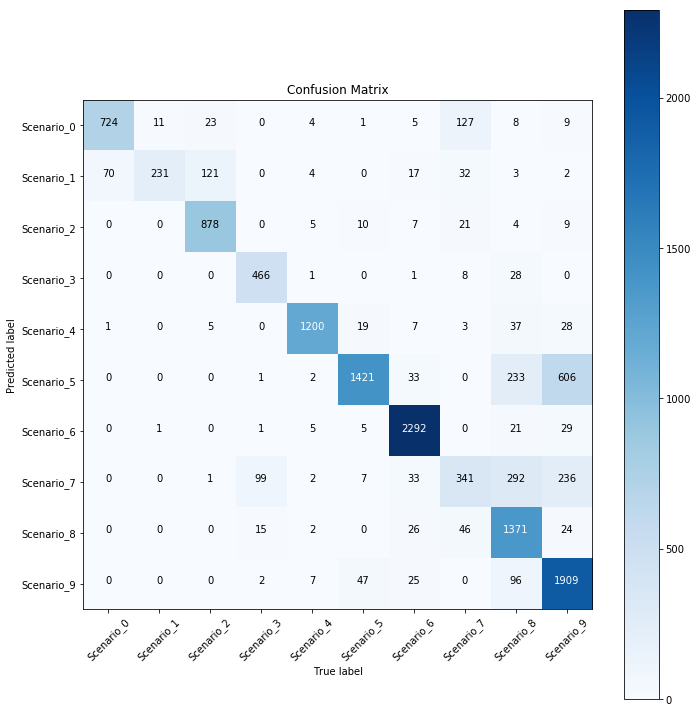

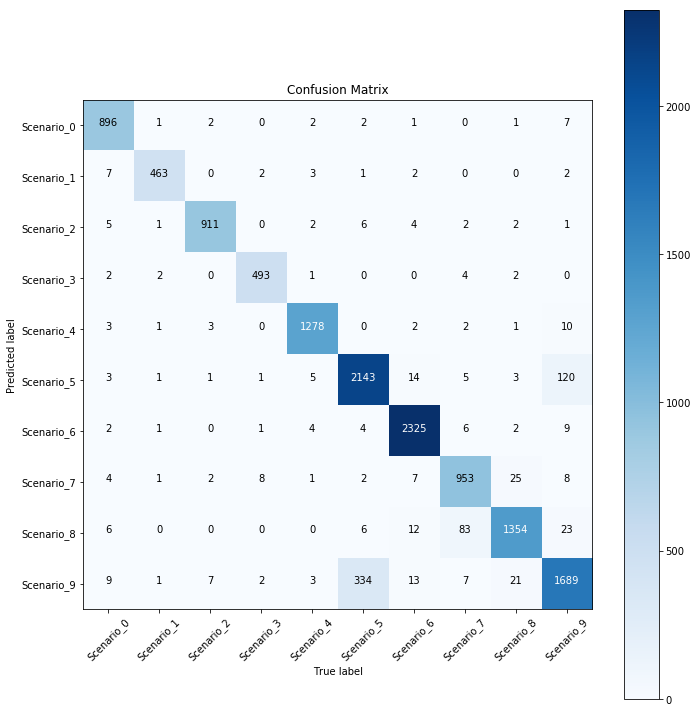

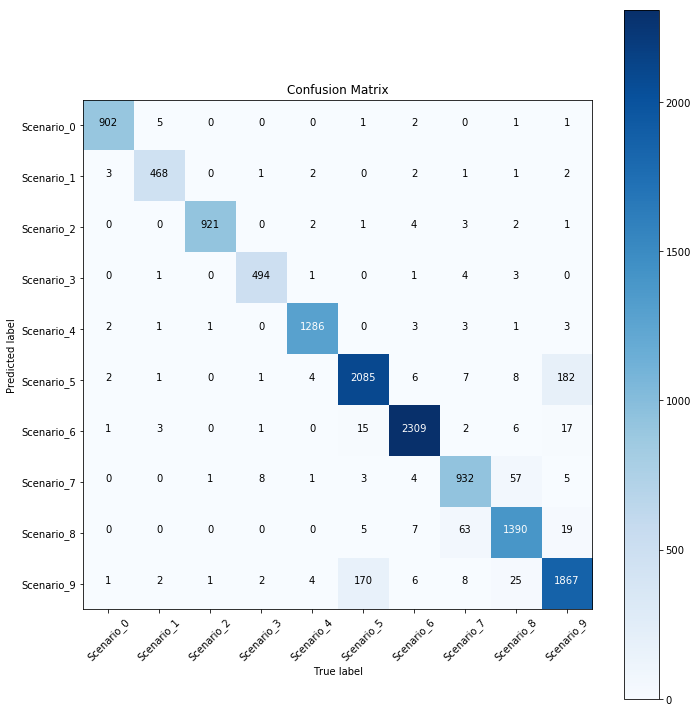

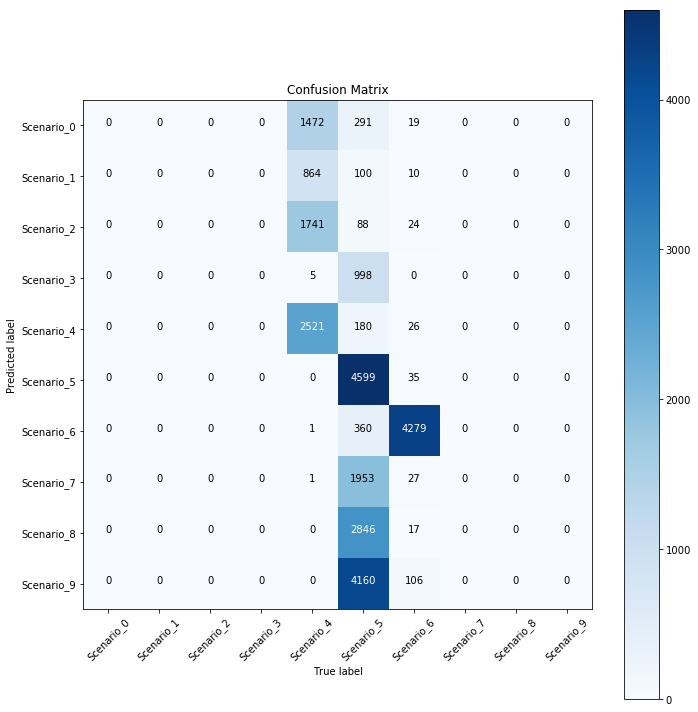

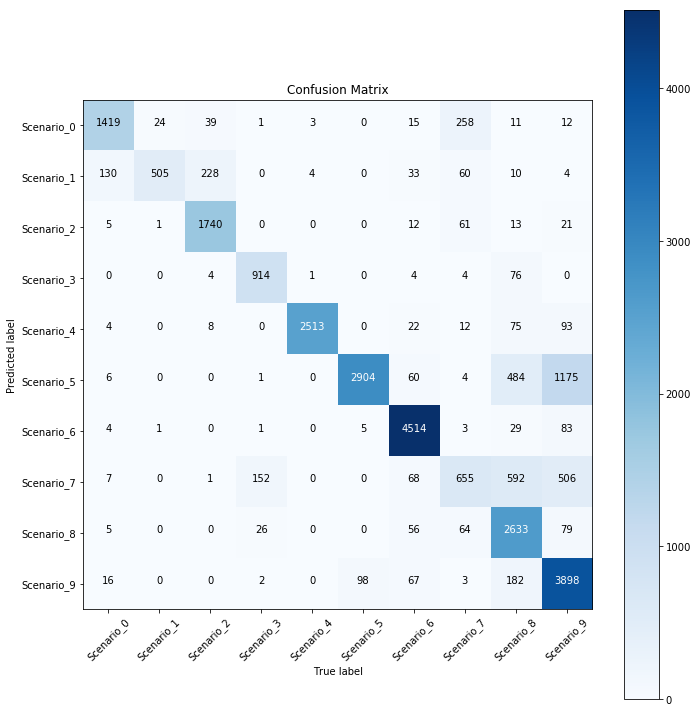

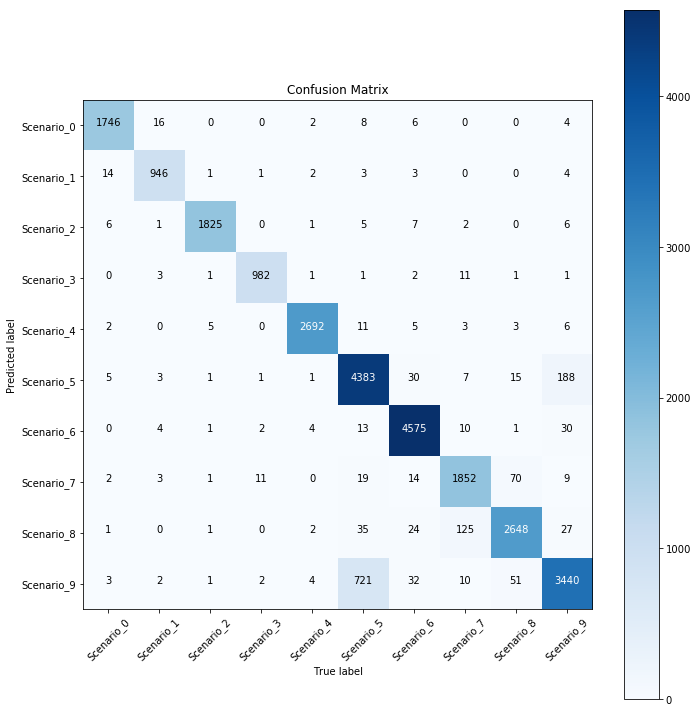

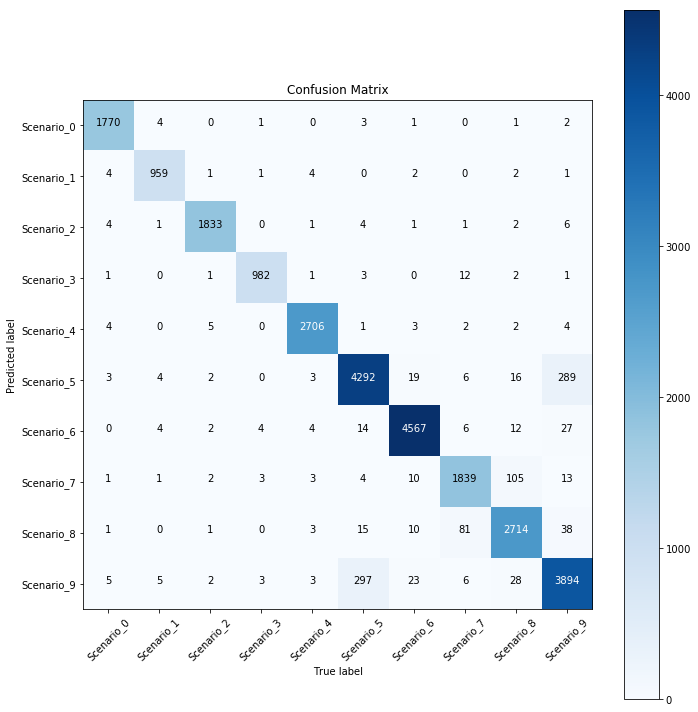

In [24]:
setup_dataset.compute_cm(y_test, dtc_pred, dtc_c)

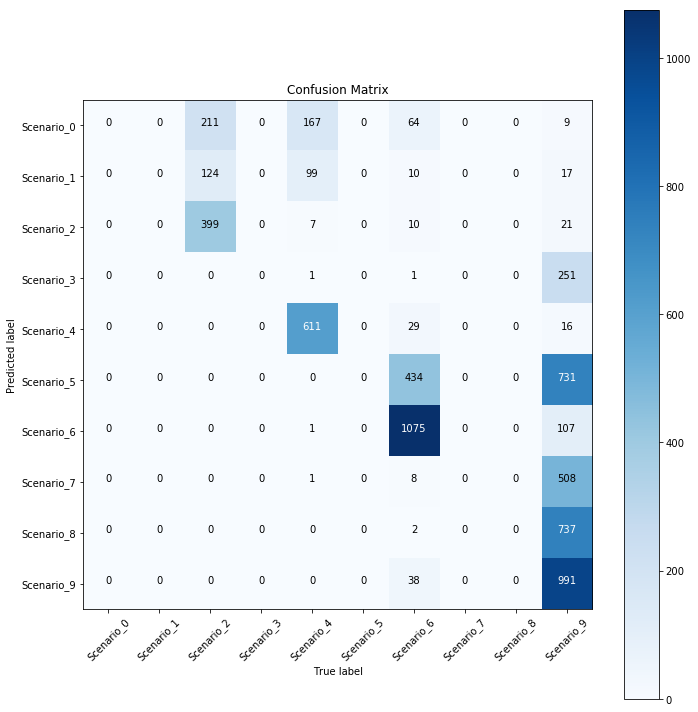

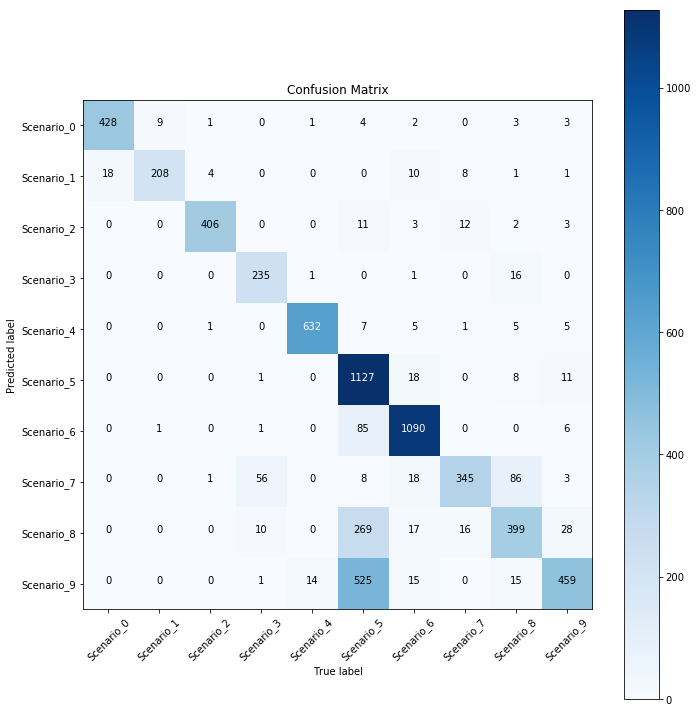

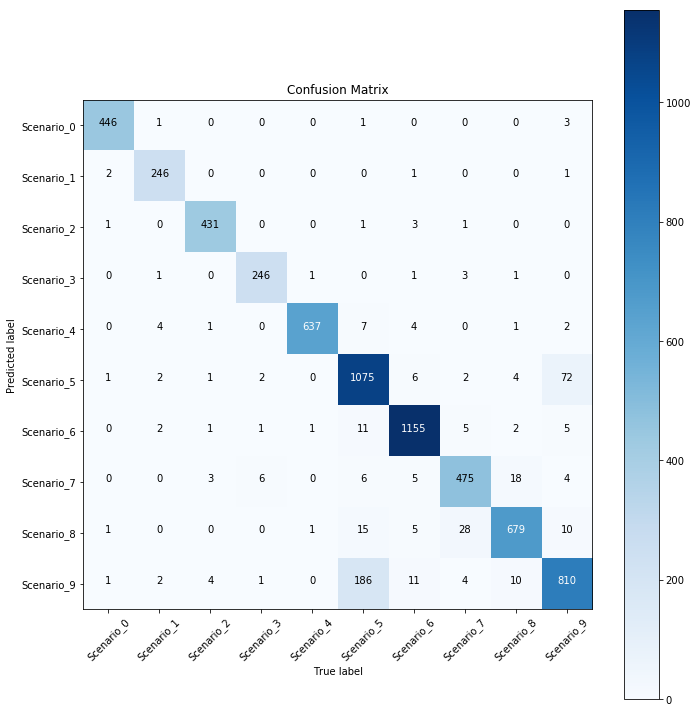

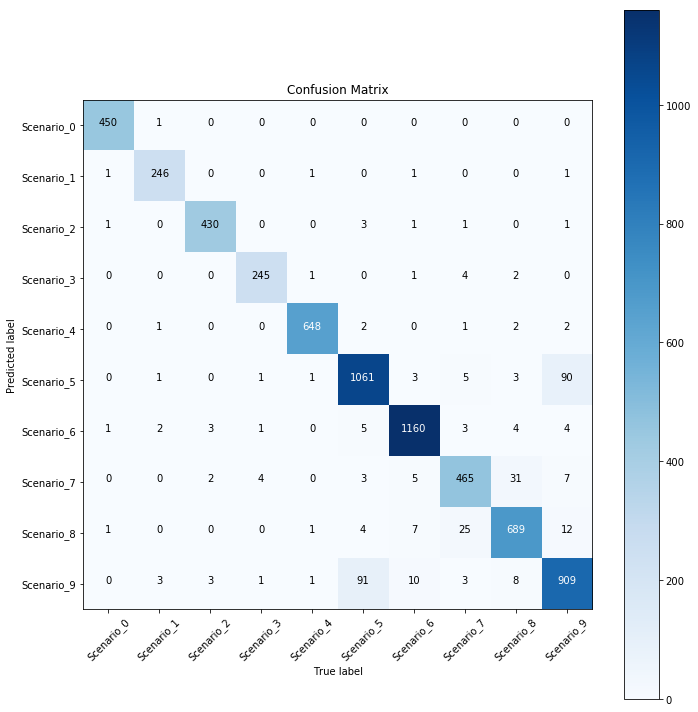

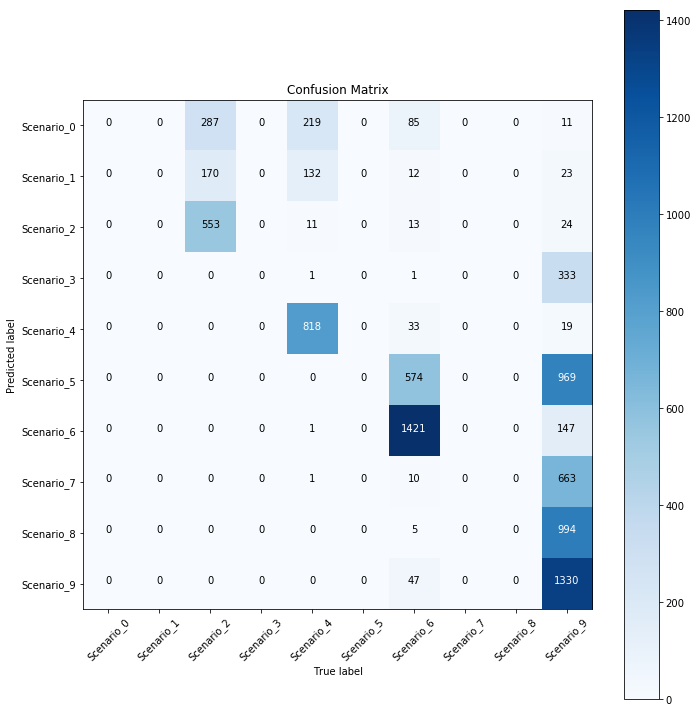

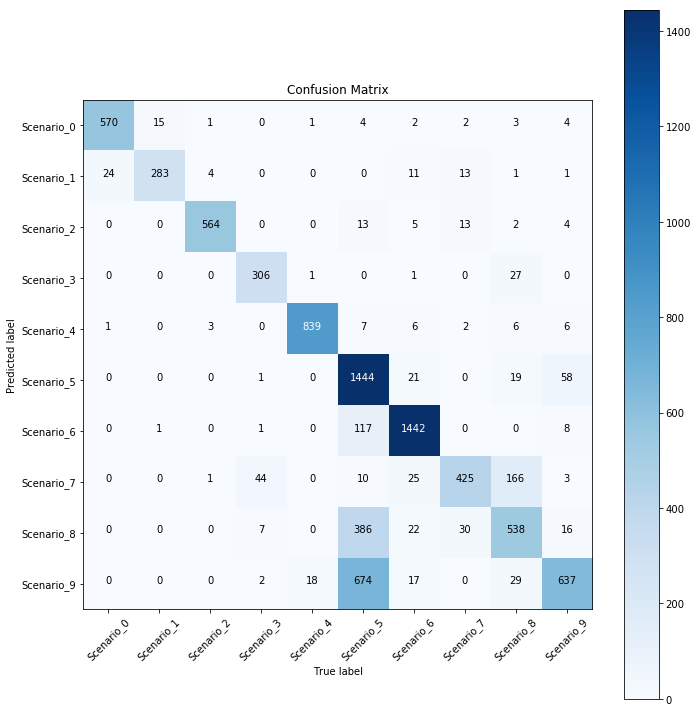

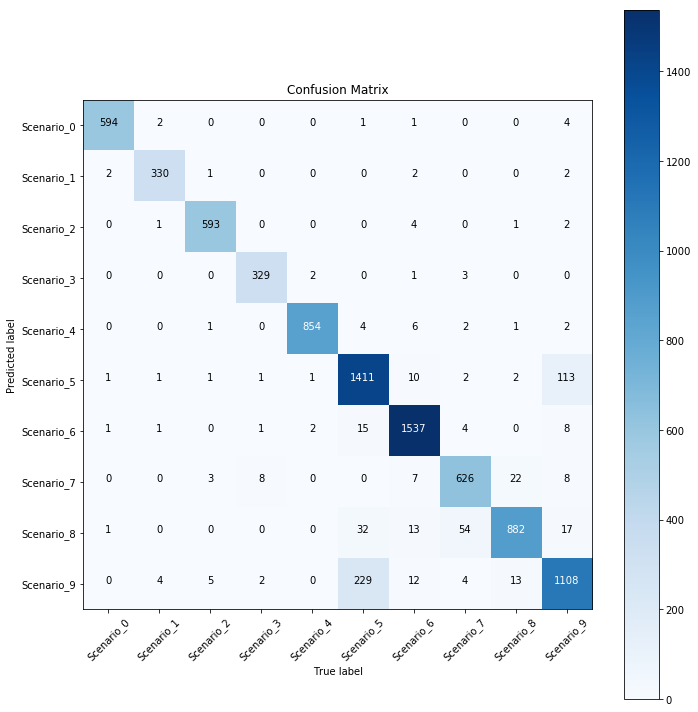

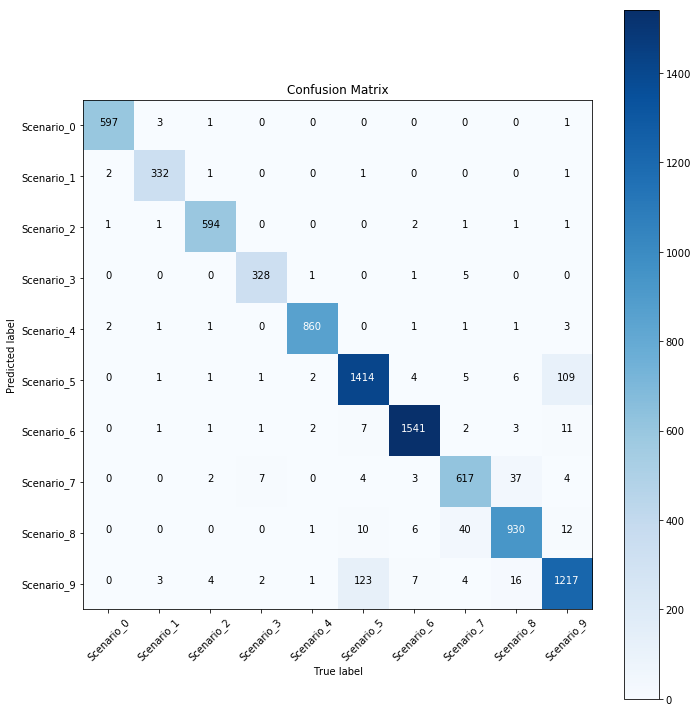

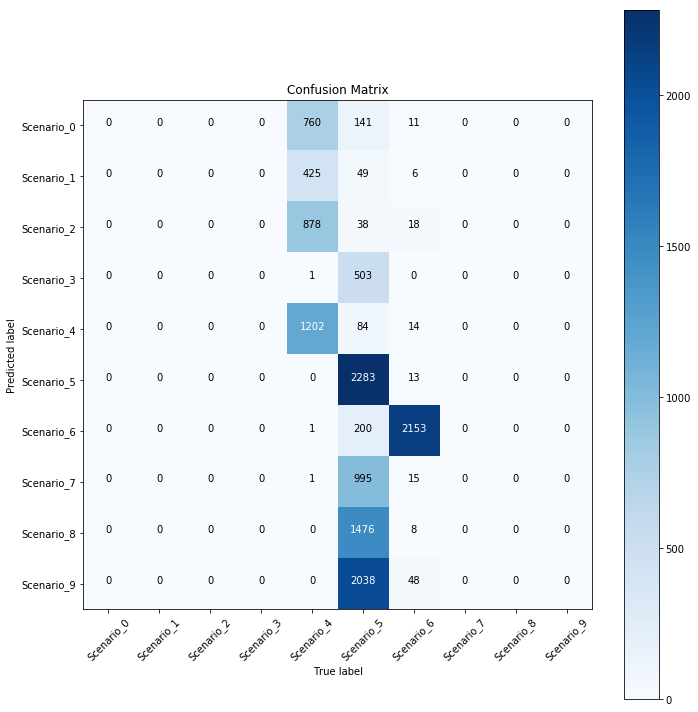

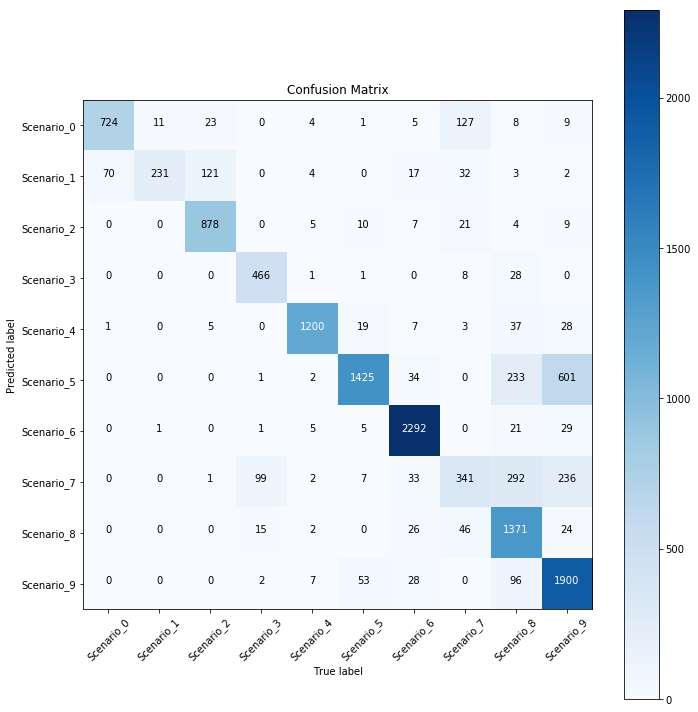

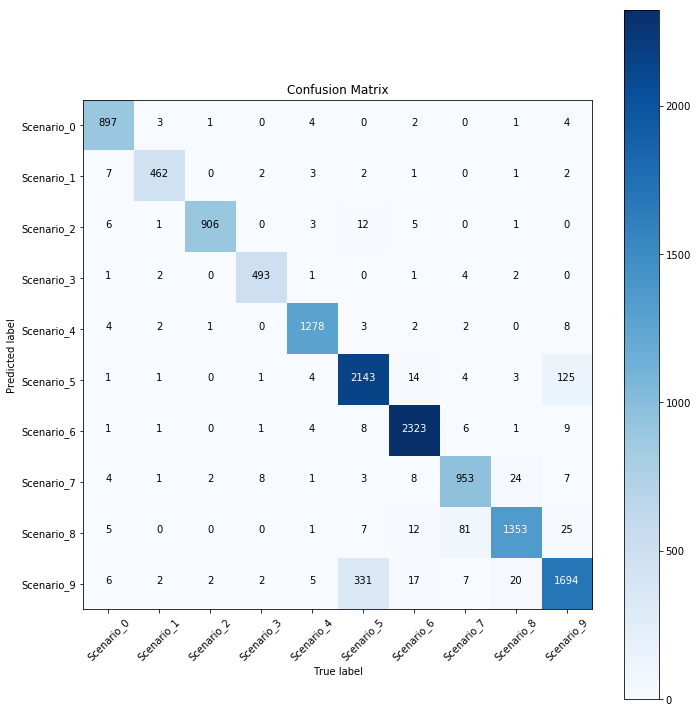

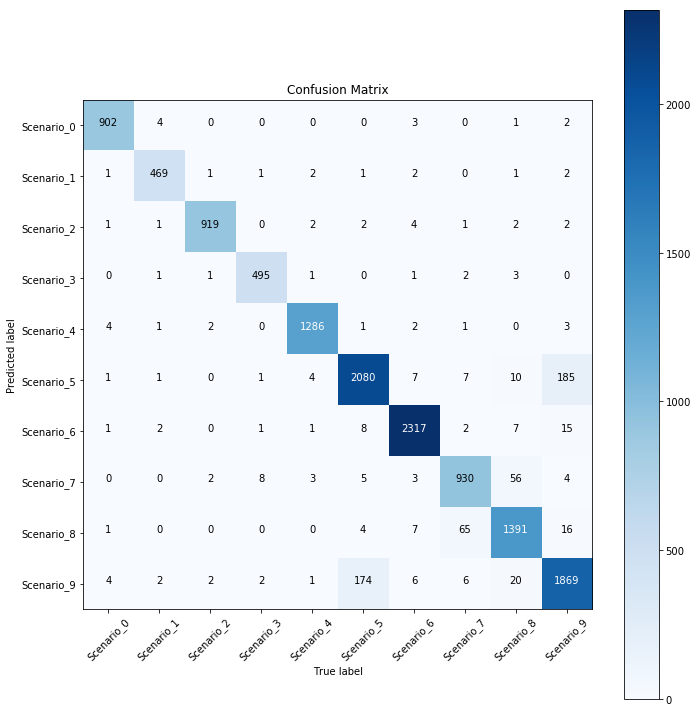

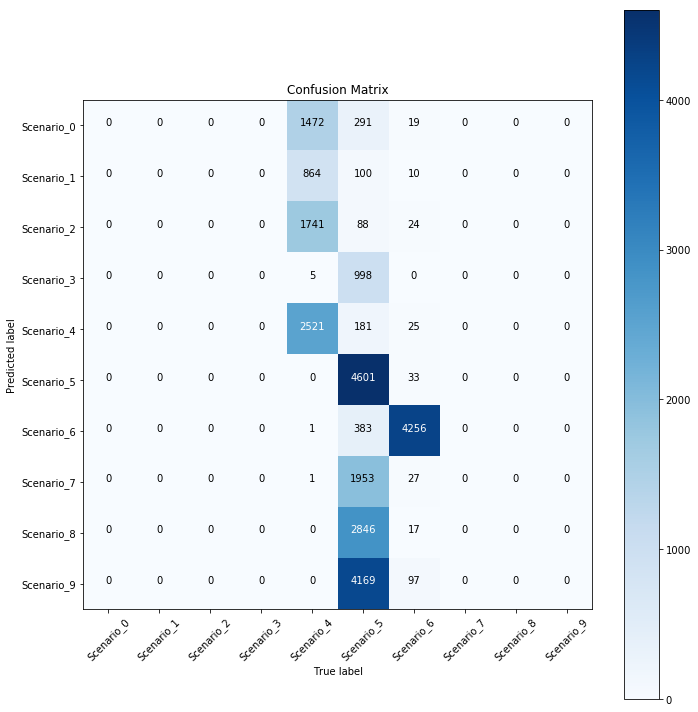

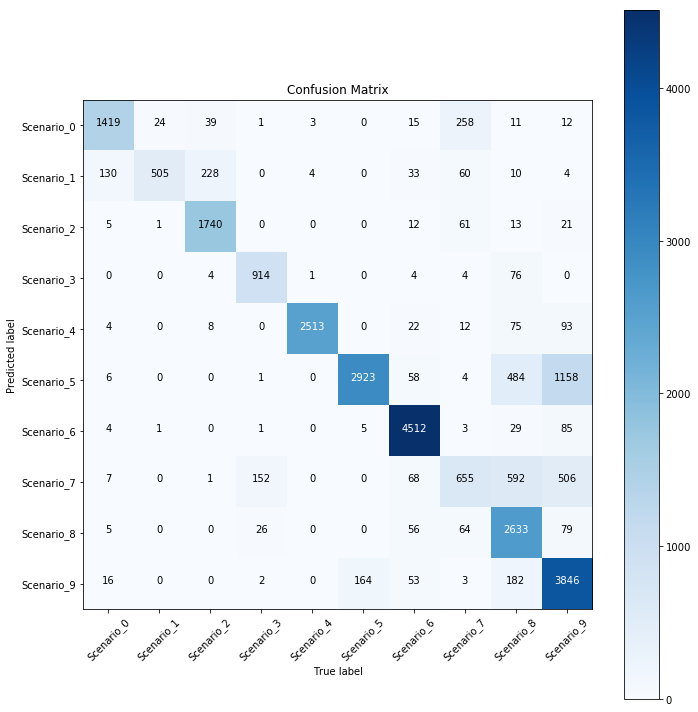

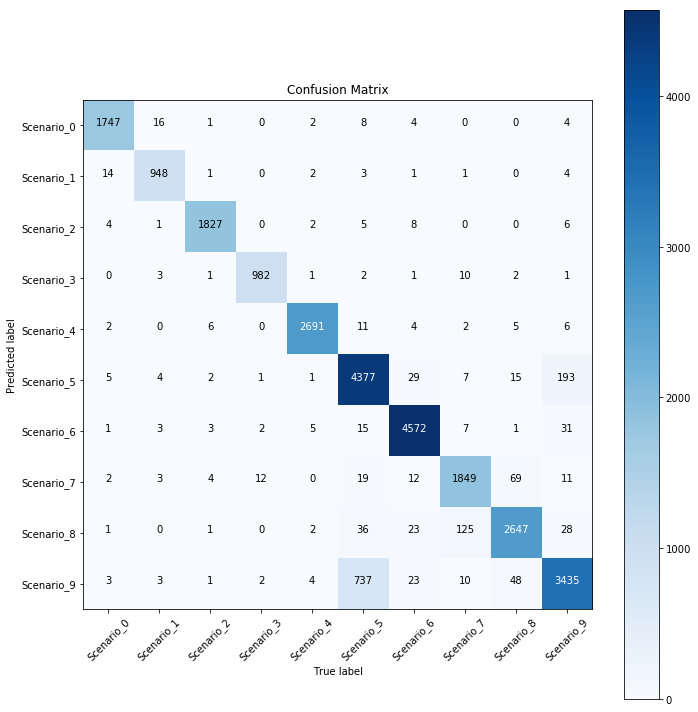

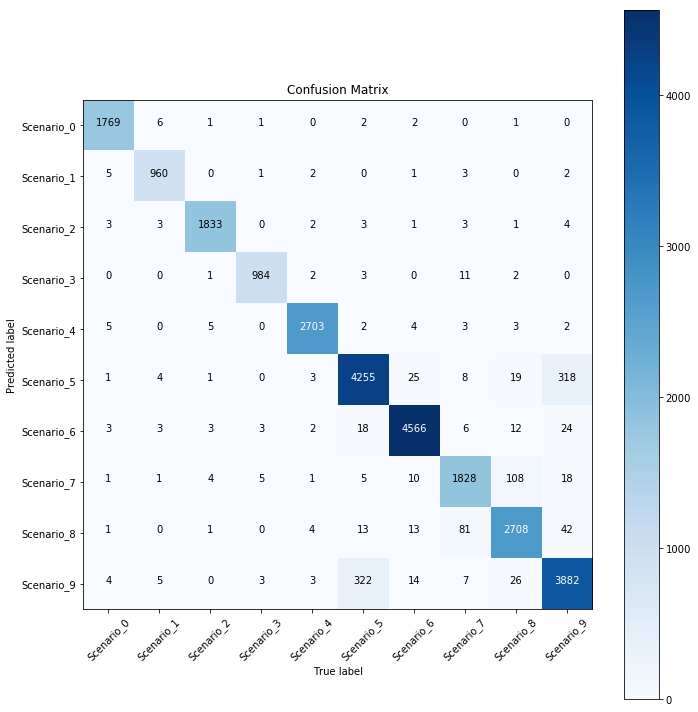

In [25]:
setup_dataset.compute_cm(y_test, dtc_pred_scaled, dtc_c)

In [61]:
for line in dtc_accs :
    print(line)
print("====================") 
for line in dtc_accs_scaled:
    print(line)

[0.46017964071856288, 0.79730538922155691, 0.92769461077844306, 0.94041916167664674]
[0.46266981026159198, 0.79117547995958237, 0.92848321544852364, 0.94431346132255534]
[0.42204924781079262, 0.8107926053439114, 0.93548387096774188, 0.9480577801062795]
[0.42656138906559893, 0.81184747221494591, 0.9391909590989036, 0.95625491149945741]
[0.46047904191616768, 0.79775449101796403, 0.92889221556886226, 0.94311377245508987]
[0.46278208150892558, 0.79128775120691586, 0.92747277422252161, 0.94408891882788815]
[0.4219744031135394, 0.81041838185764536, 0.93488511338971636, 0.94626150737220271]
[0.4257755491524155, 0.81053773902630688, 0.938442540133967, 0.95494517831081838]


In [26]:
nbc_list, nbc_accs, nbc_pred, nbc_pred_times, nbc_fit_times = \
setup_dataset.run_naive_bayes(X_train, X_test, y_train, y_test, (1,))

In [27]:
nbc_list_scaled, nbc_accs_scaled, nbc_pred_scaled, nbc_pred_times_scaled, nbc_fit_times_scaled = \
setup_dataset.run_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

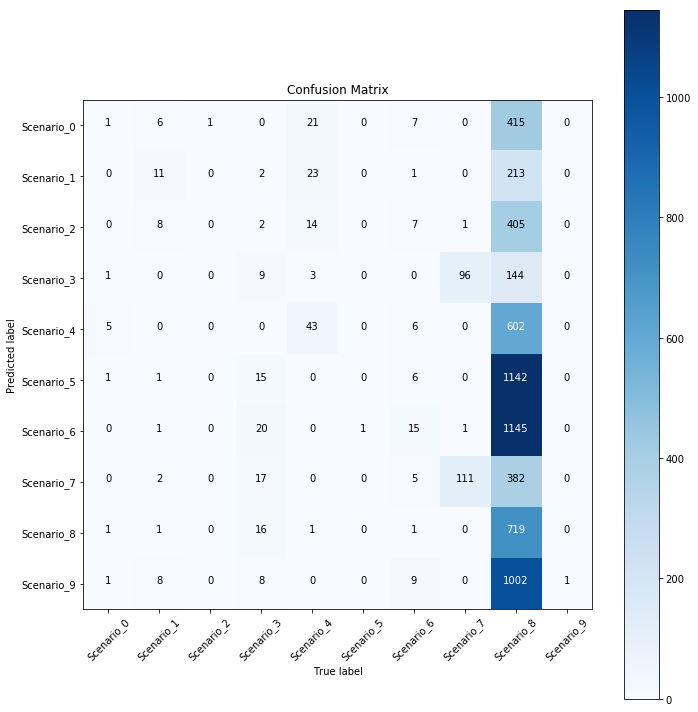

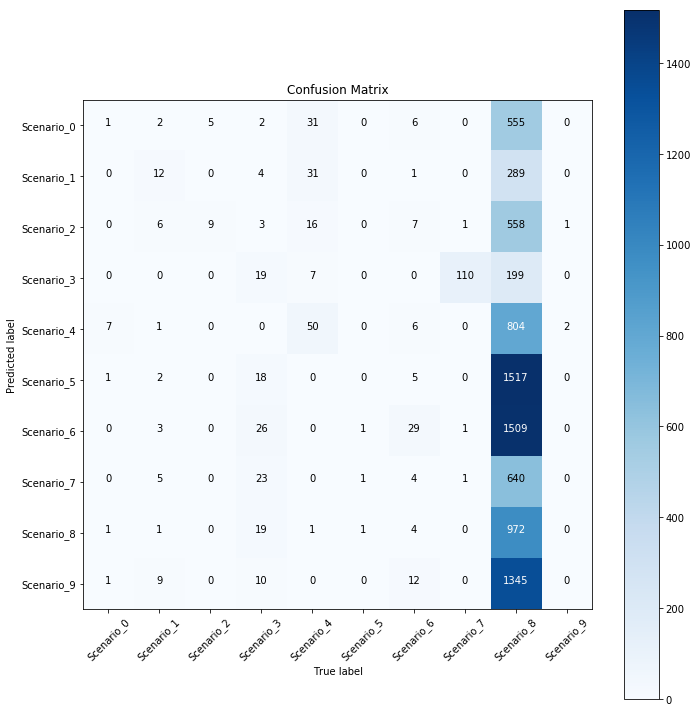

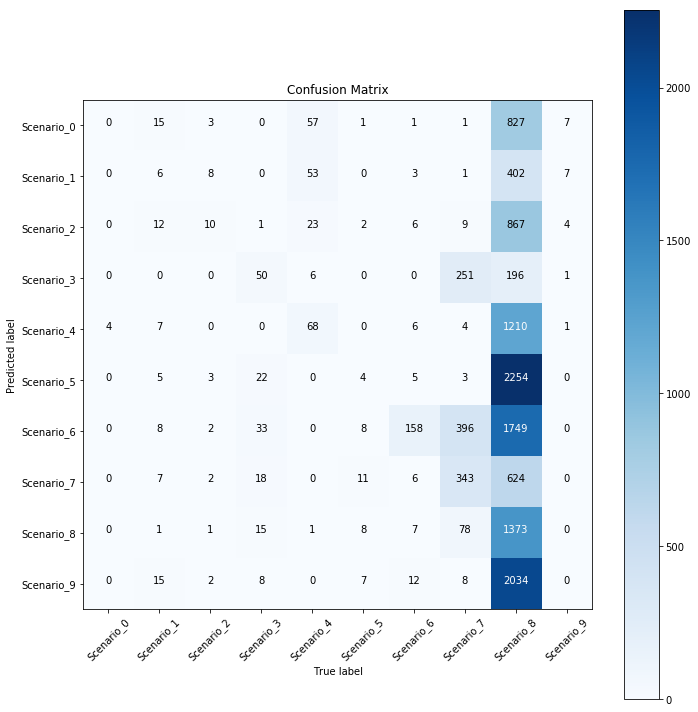

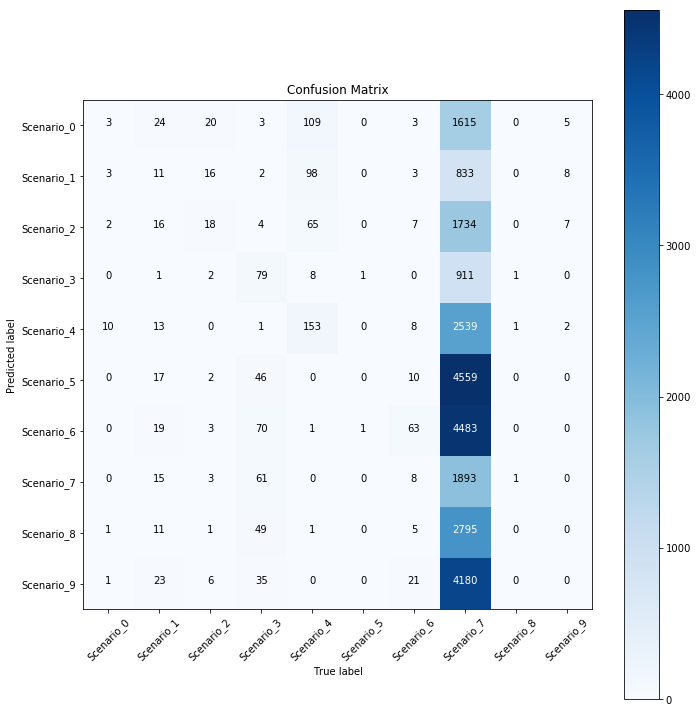

In [28]:
setup_dataset.compute_cm(y_test, nbc_pred, [1])

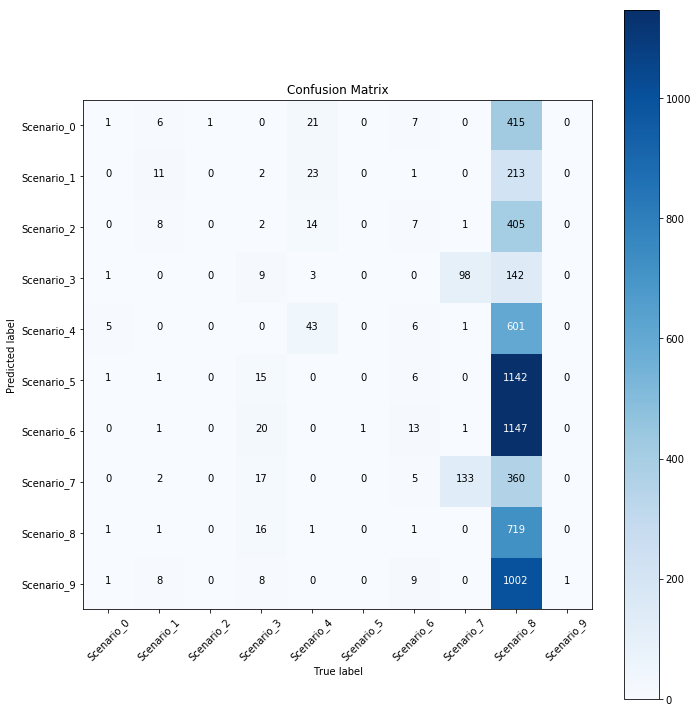

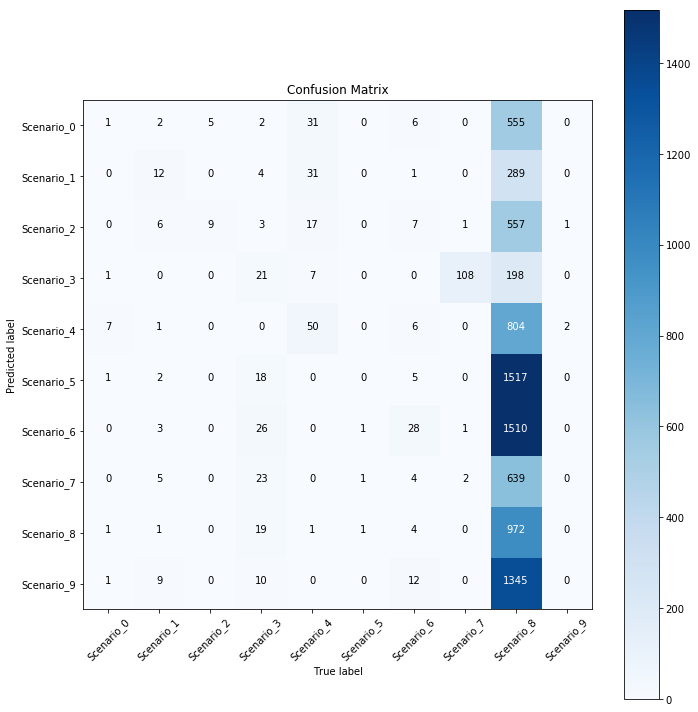

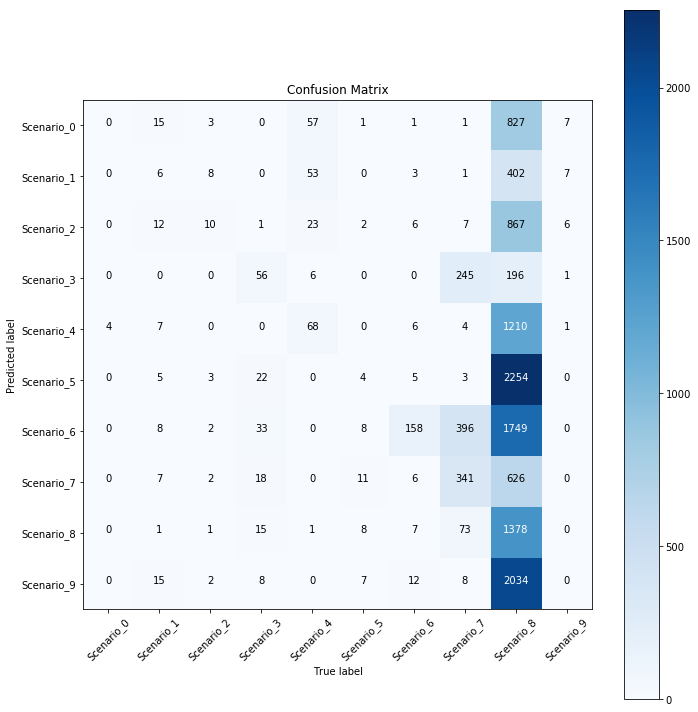

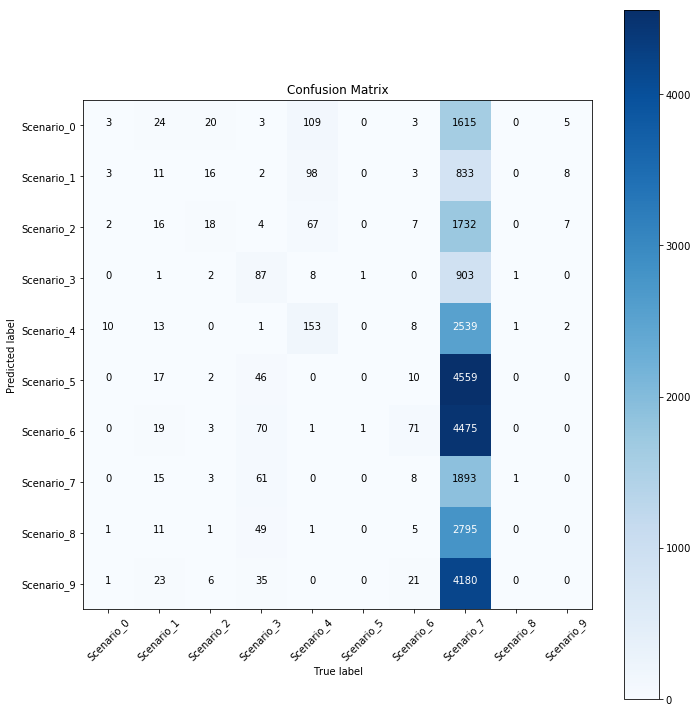

In [29]:
setup_dataset.compute_cm(y_test, nbc_pred_scaled, [1])

In [30]:
abc_list, abc_accs, abc_pred, abc_pred_times, abc_fit_times = \
setup_dataset.run_adaboost(X_train, X_test, y_train, y_test, (1,))

In [31]:
abc_list_scaled, abc_accs_scaled, abc_pred_scaled, abc_pred_times_scaled, abc_fit_times_scaled = \
setup_dataset.run_adaboost(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

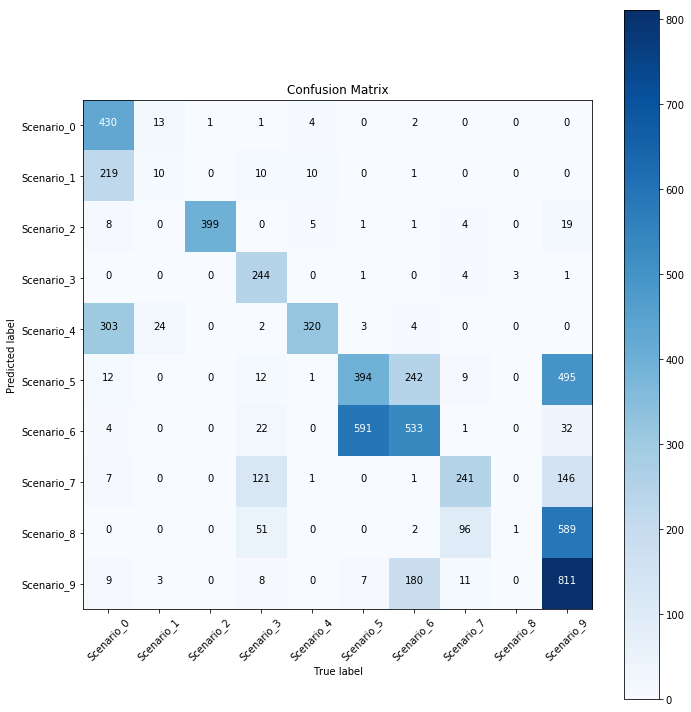

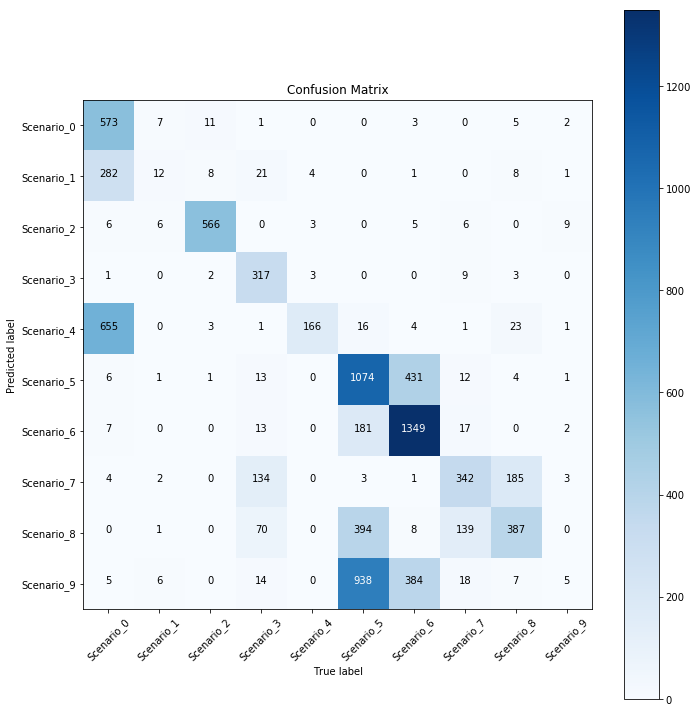

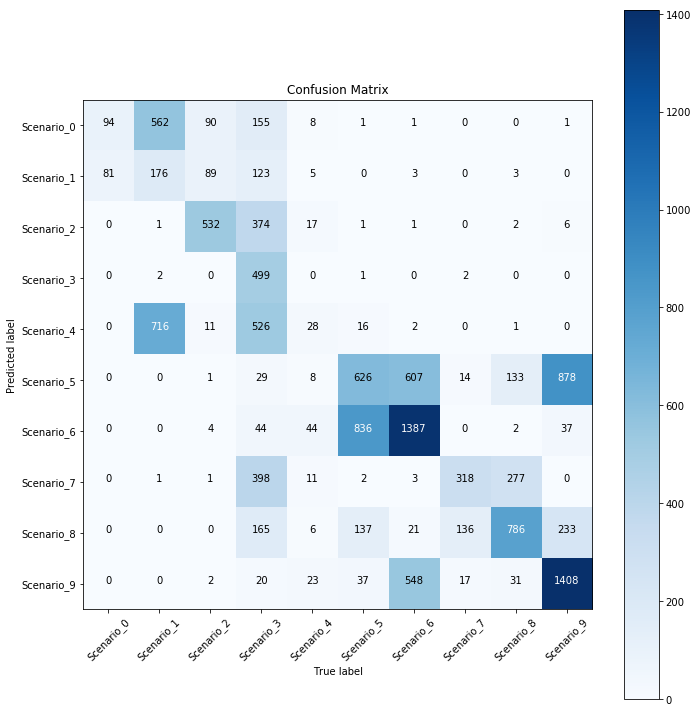

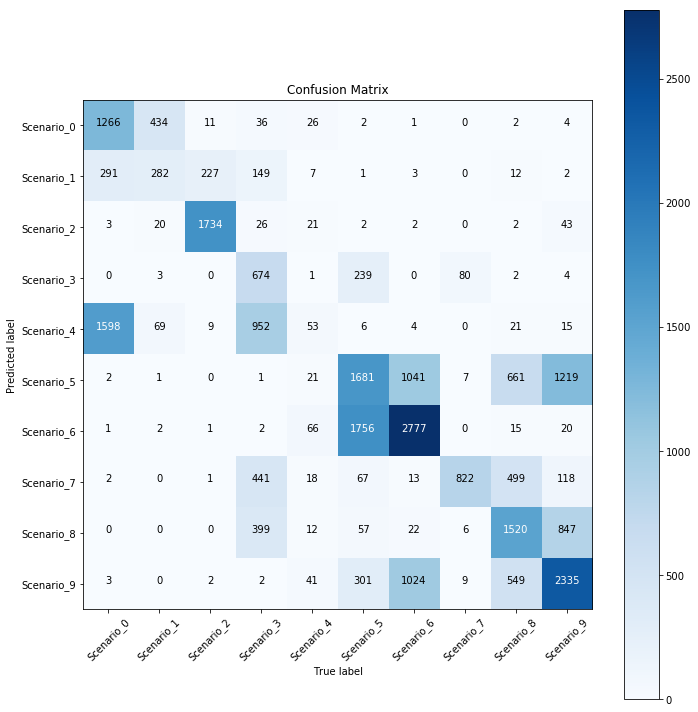

In [32]:
setup_dataset.compute_cm(y_test, abc_pred, [1])

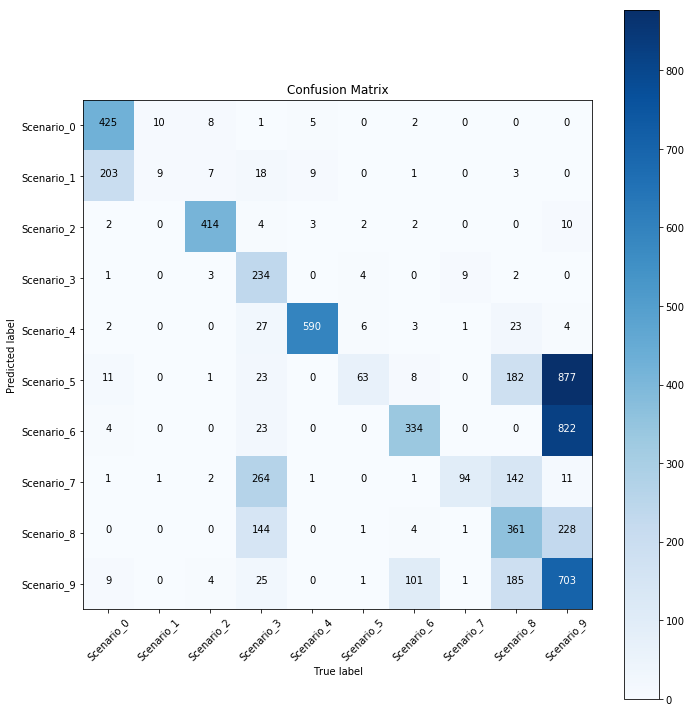

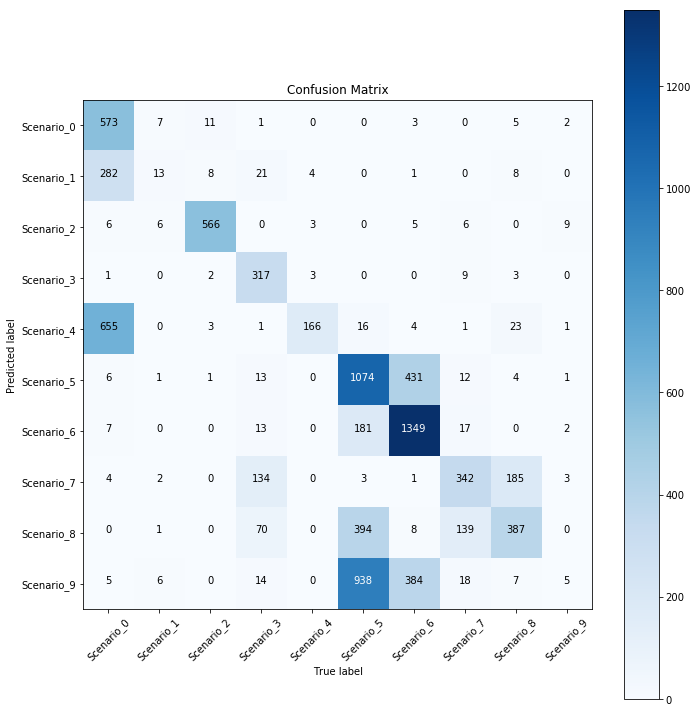

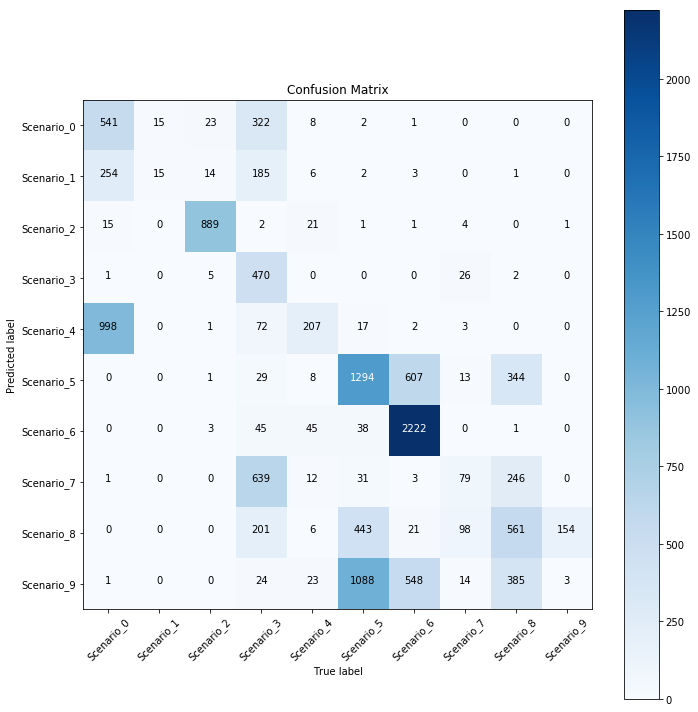

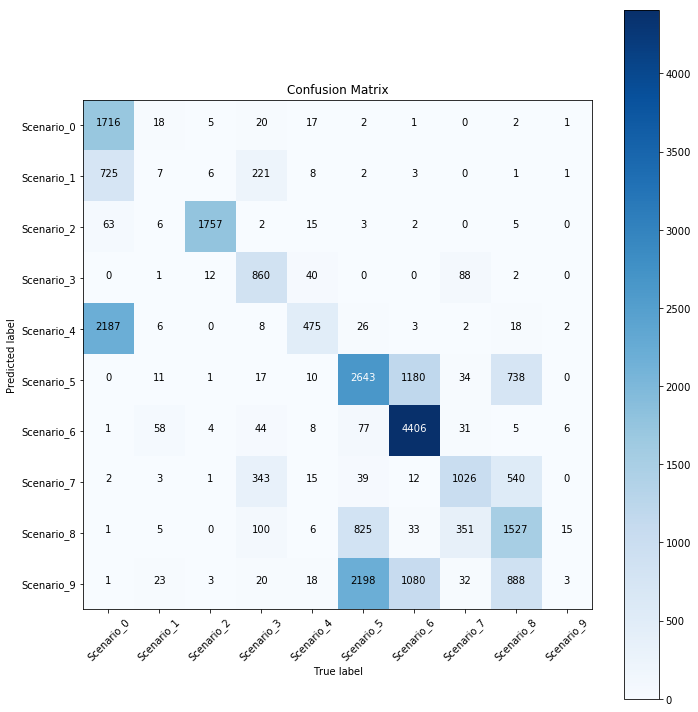

In [33]:
setup_dataset.compute_cm(y_test, abc_pred_scaled, [1])

In [34]:
qda_list, qda_accs, qda_pred, qda_pred_times, qda_fit_times = \
setup_dataset.run_quadratic(X_train, X_test, y_train, y_test, (1,))

In [35]:
qda_list_scaled, qda_accs_scaled, qda_pred_scaled, qda_pred_times_scaled, qda_fit_times_scaled = \
setup_dataset.run_quadratic(X_train_scaled, X_test_scaled, y_train, y_test, (1,))

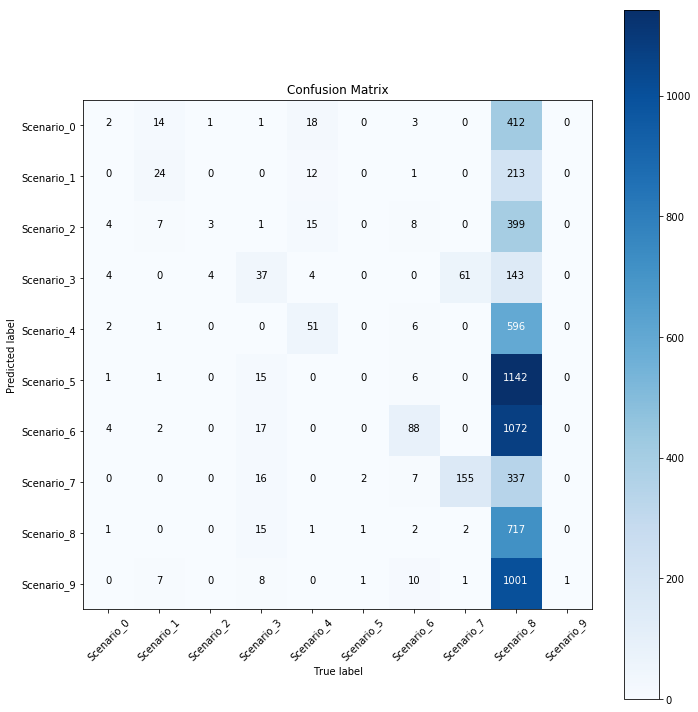

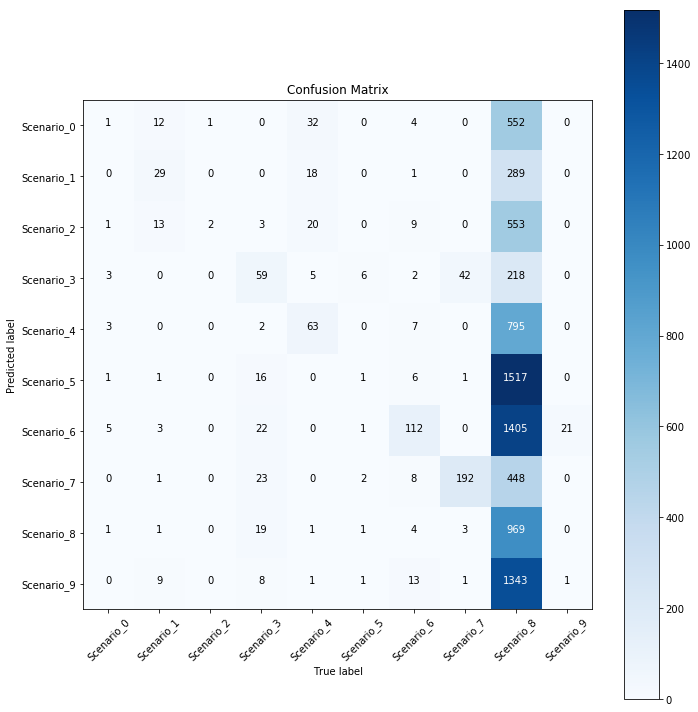

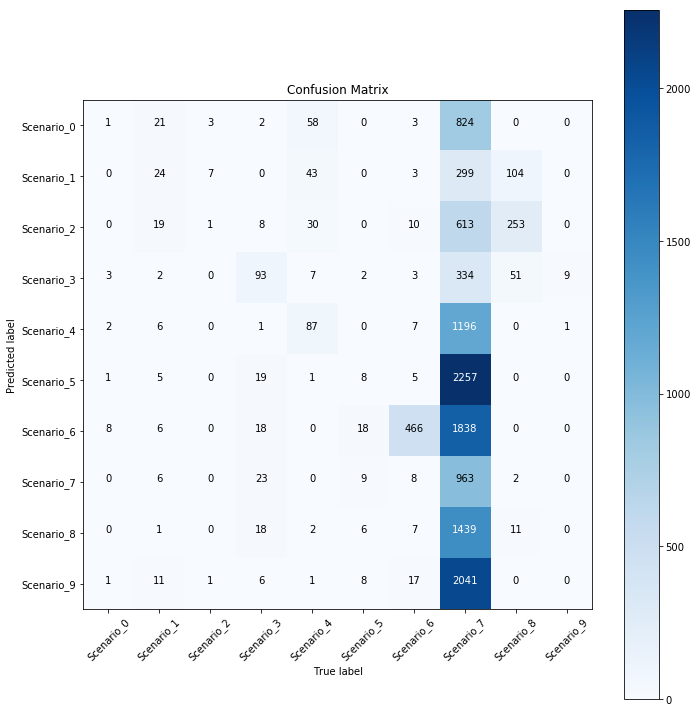

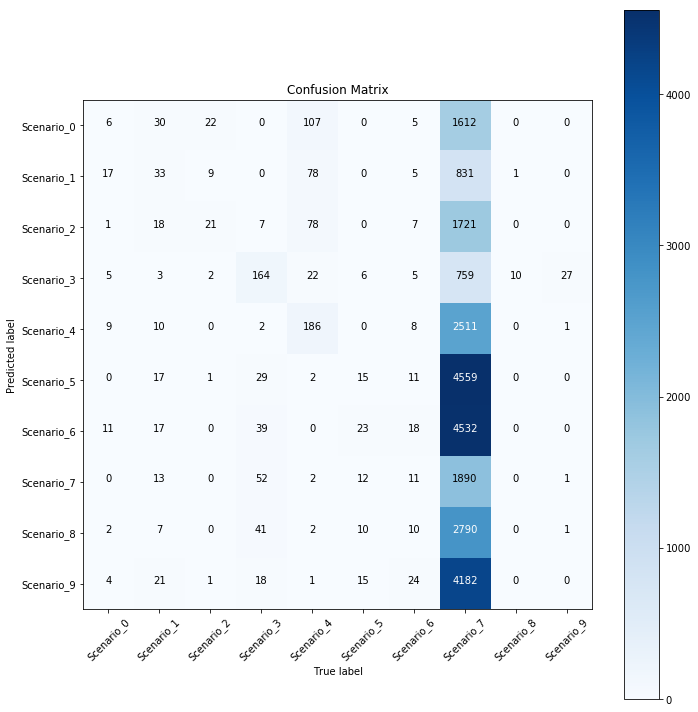

In [36]:
setup_dataset.compute_cm(y_test, qda_pred, [1])

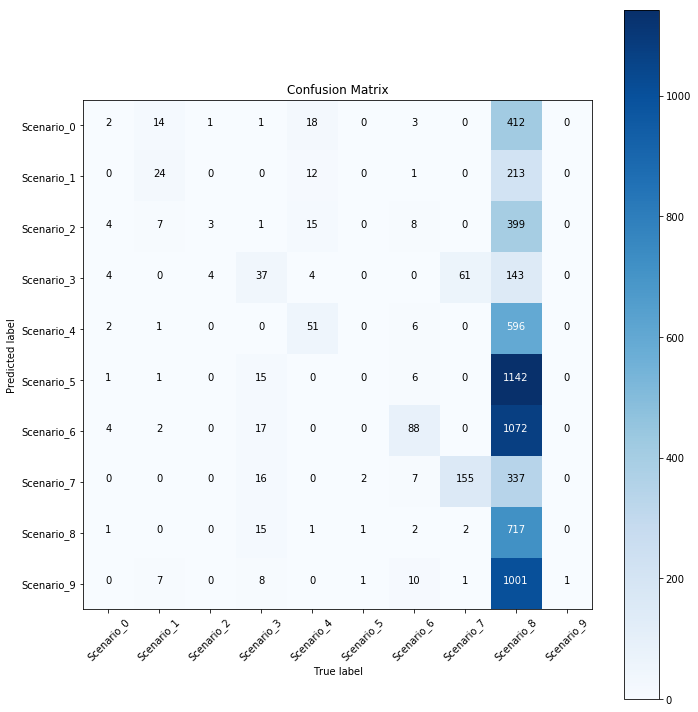

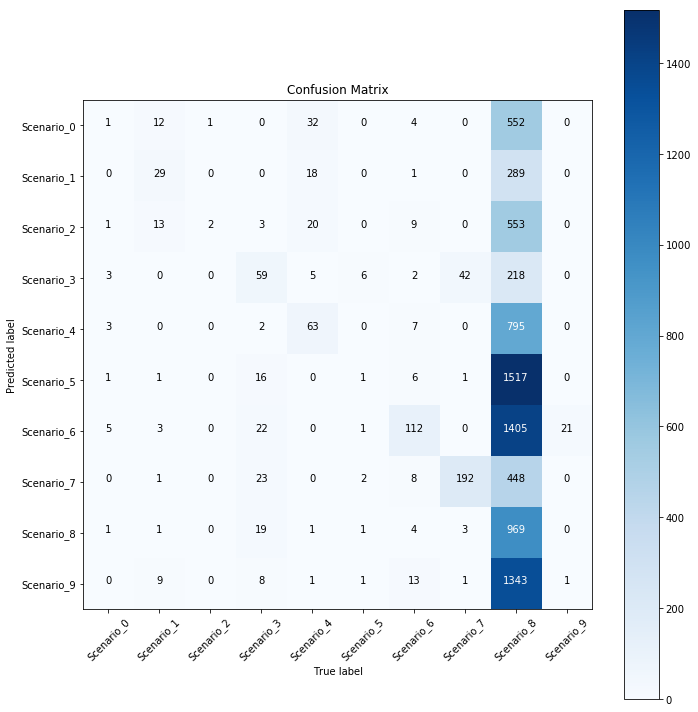

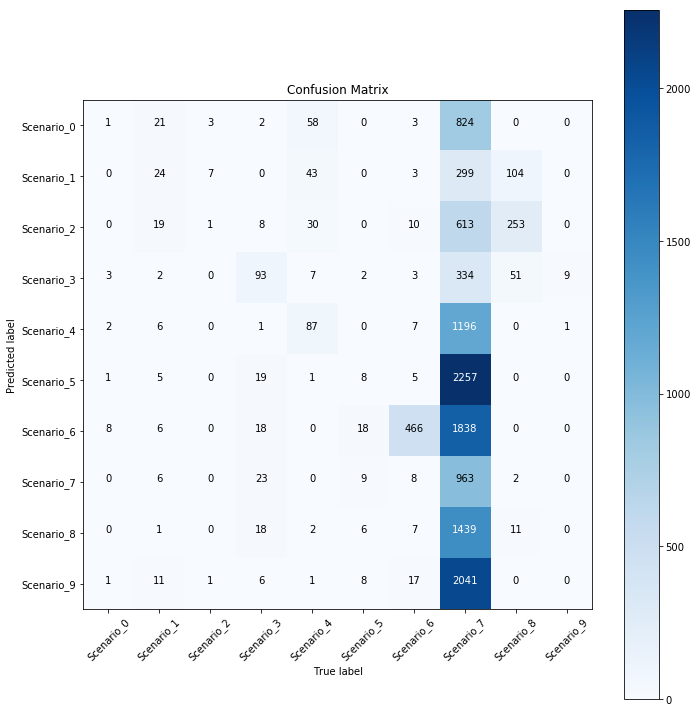

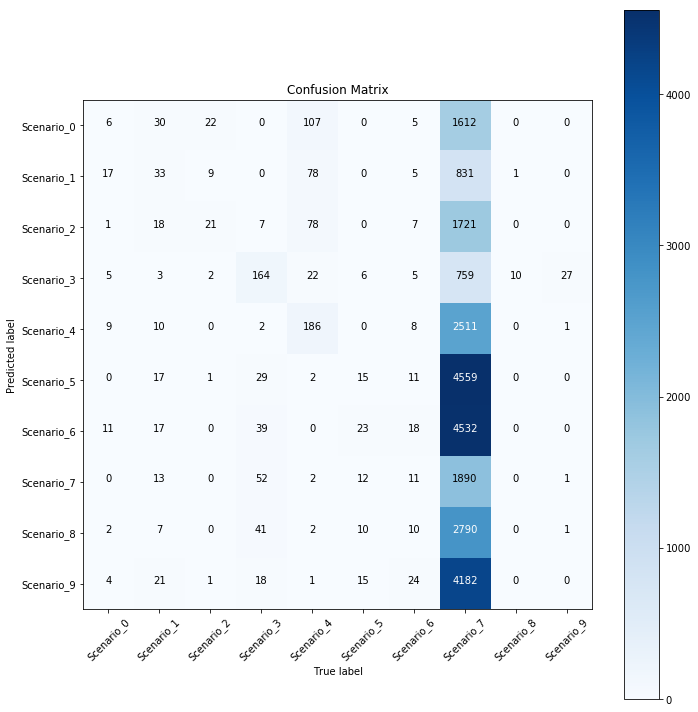

In [37]:
setup_dataset.compute_cm(y_test, qda_pred_scaled, [1])

In [72]:
svc_list, svc_accs, svc_pred, svc_pred_times, svc_fit_times = \
setup_dataset.run_svc(X_train, X_test, y_train, y_test, svc_c)

In [67]:
svc_list_scaled, svc_accs_scaled, svc_pred_scaled, svc_pred_times_scaled, svc_fit_times_scaled = \
setup_dataset.run_svc(X_train_scaled, X_test_scaled, y_train, y_test, svc_c)

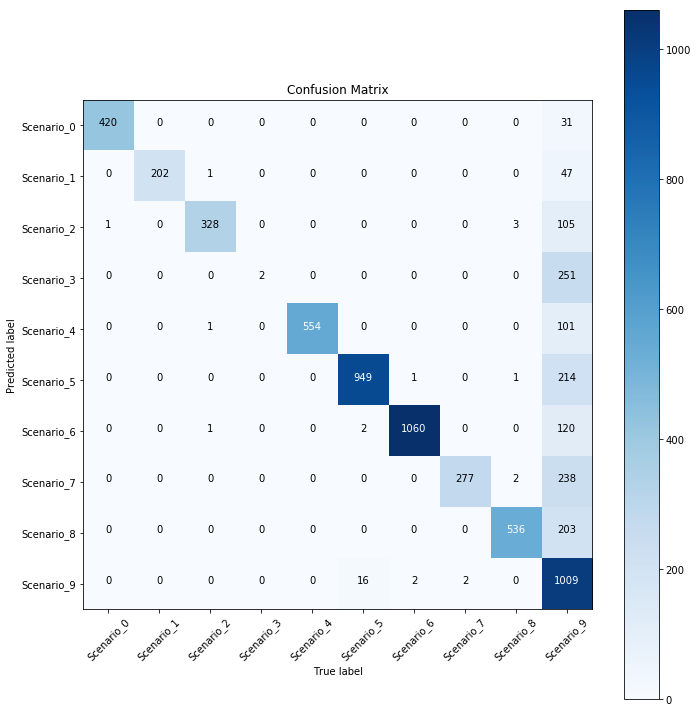

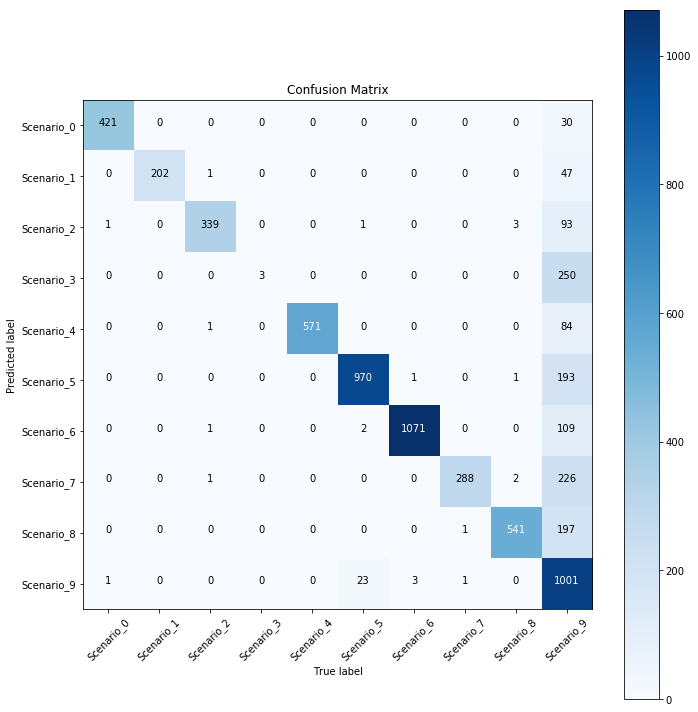

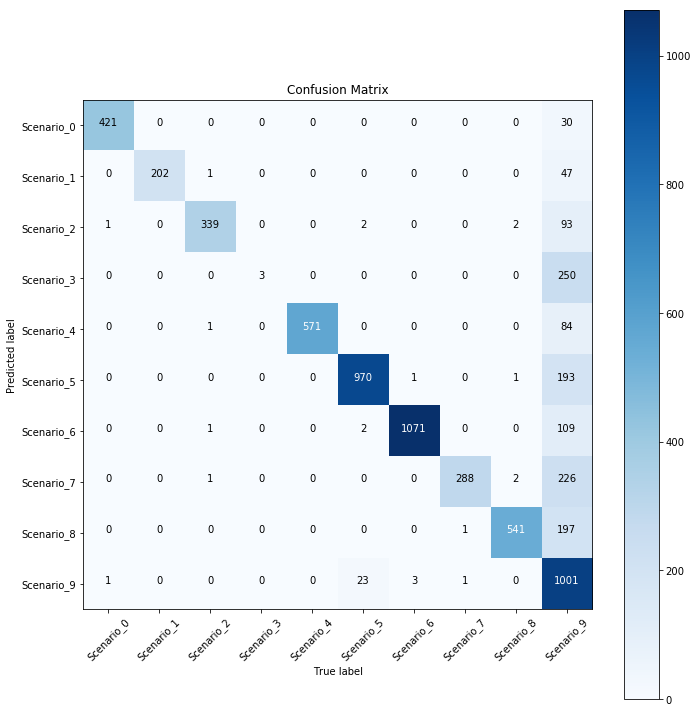

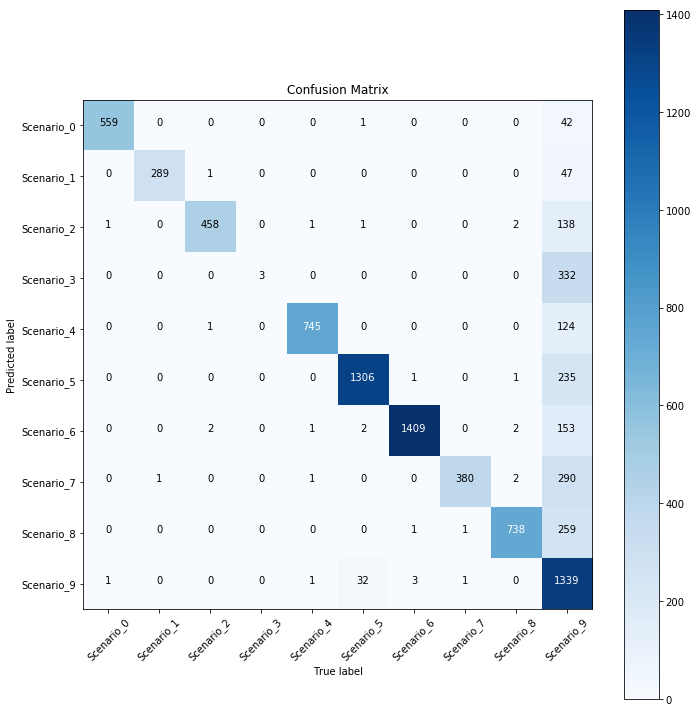

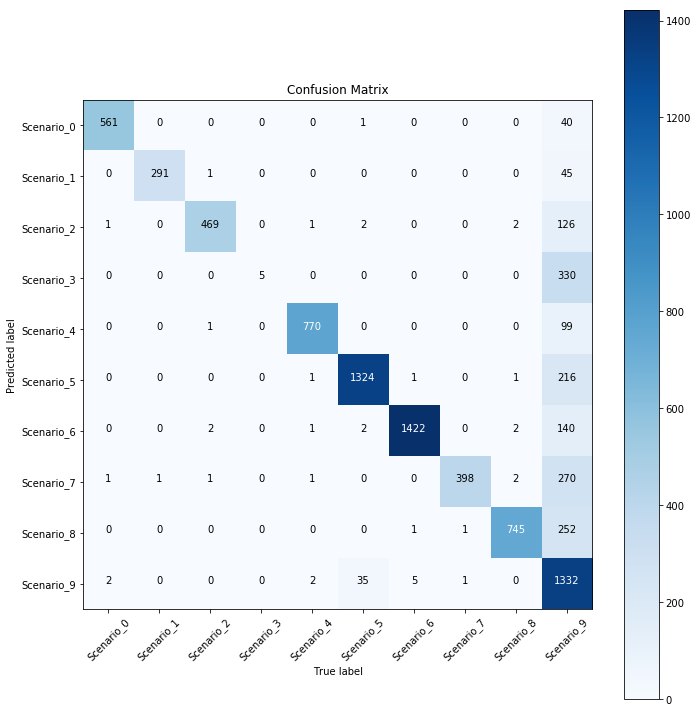

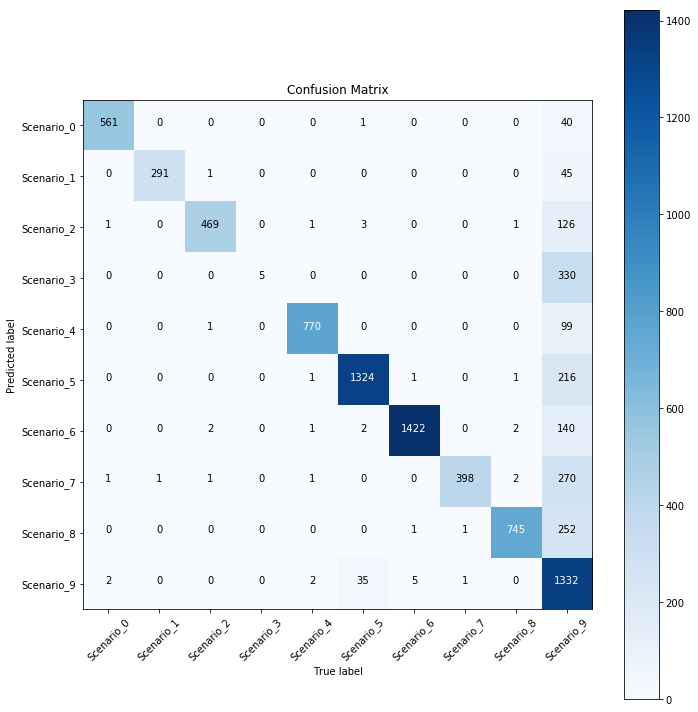

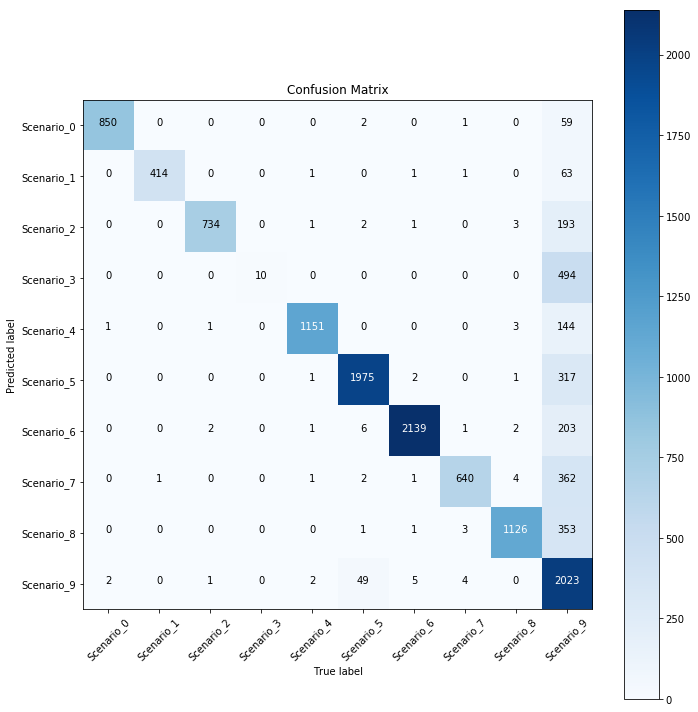

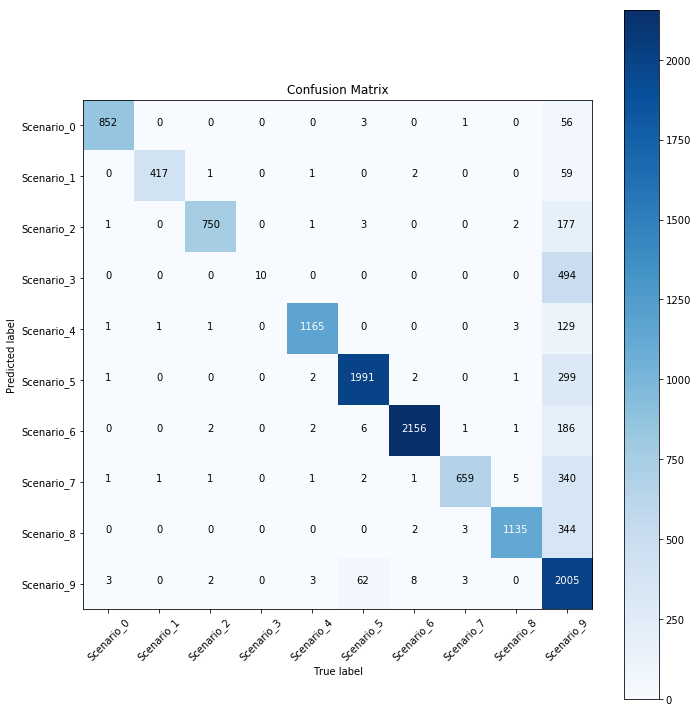

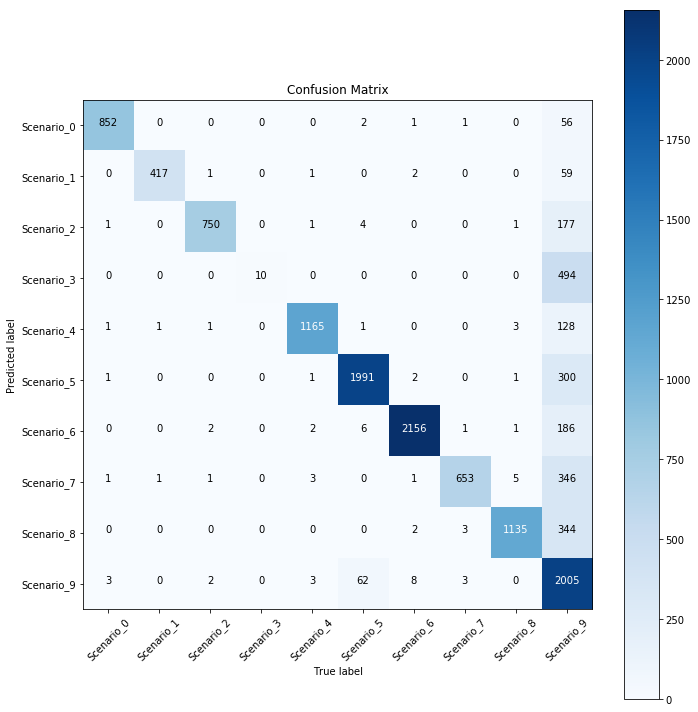

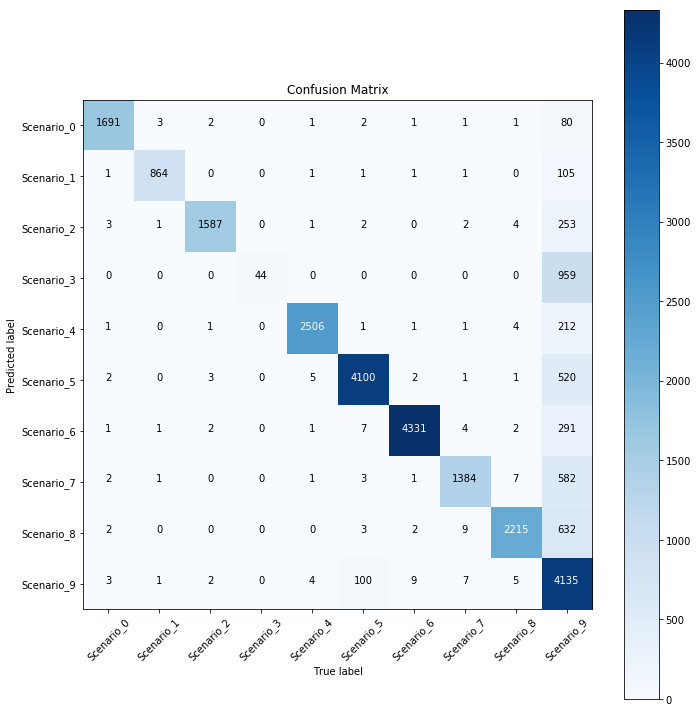

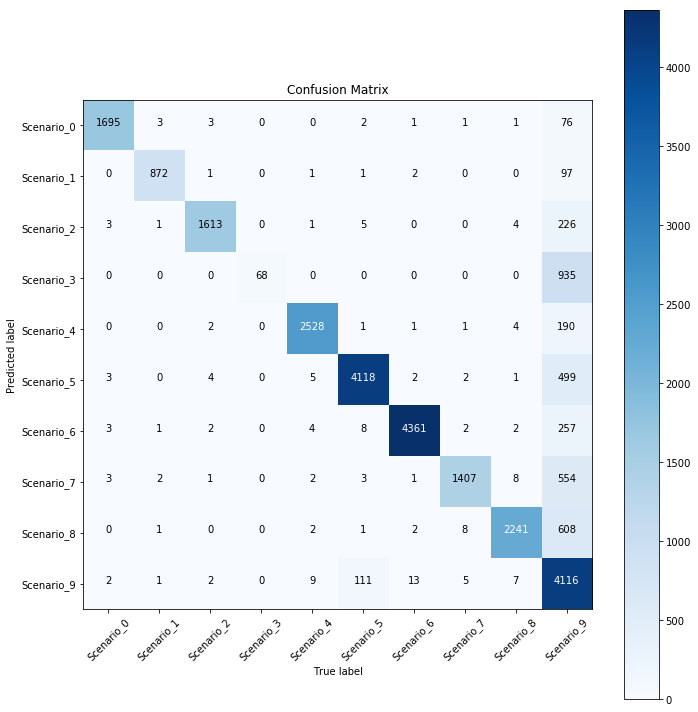

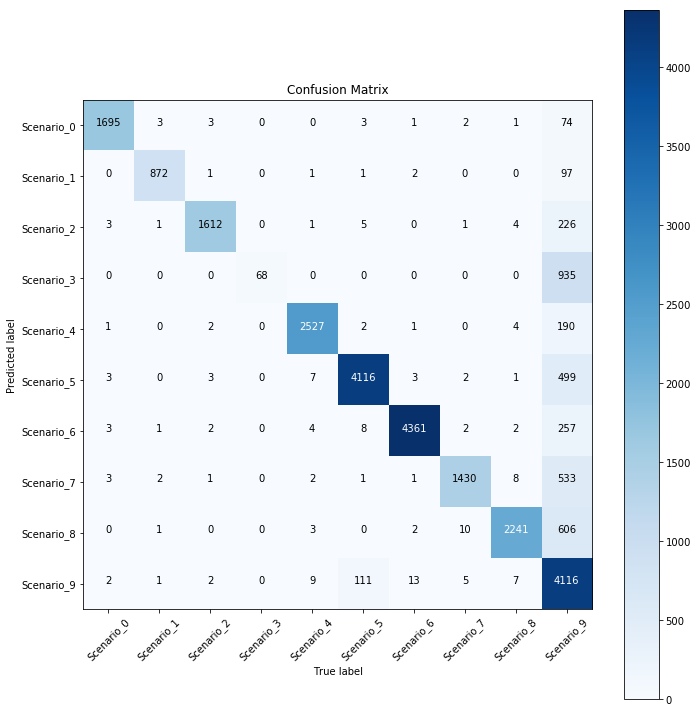

In [44]:
setup_dataset.compute_cm(y_test, svc_pred, svc_c)

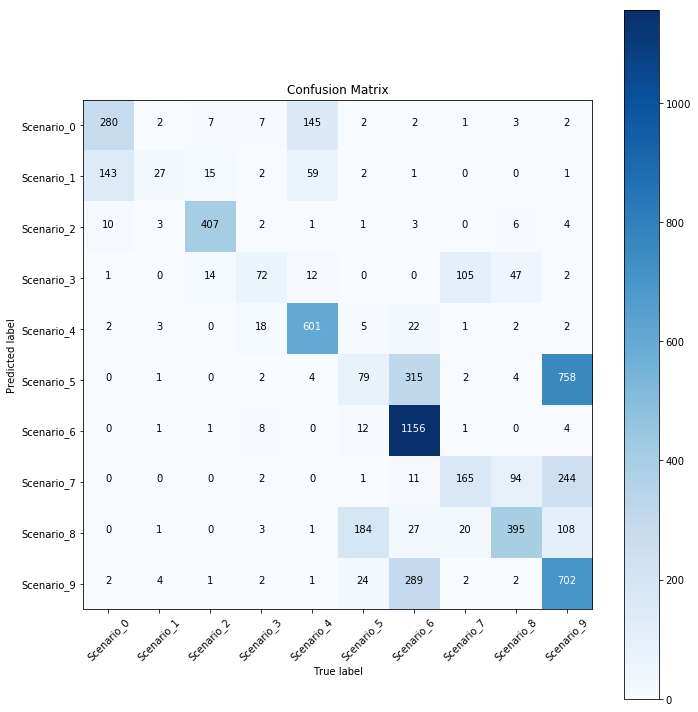

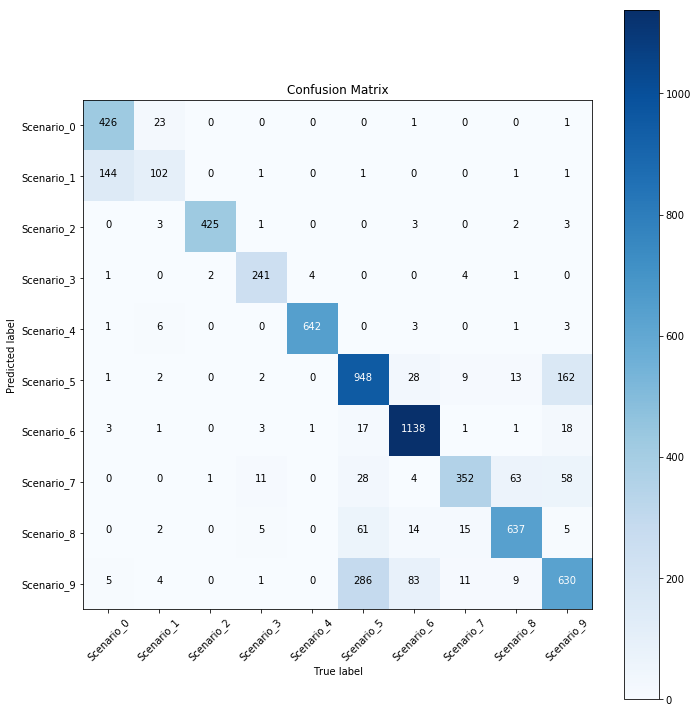

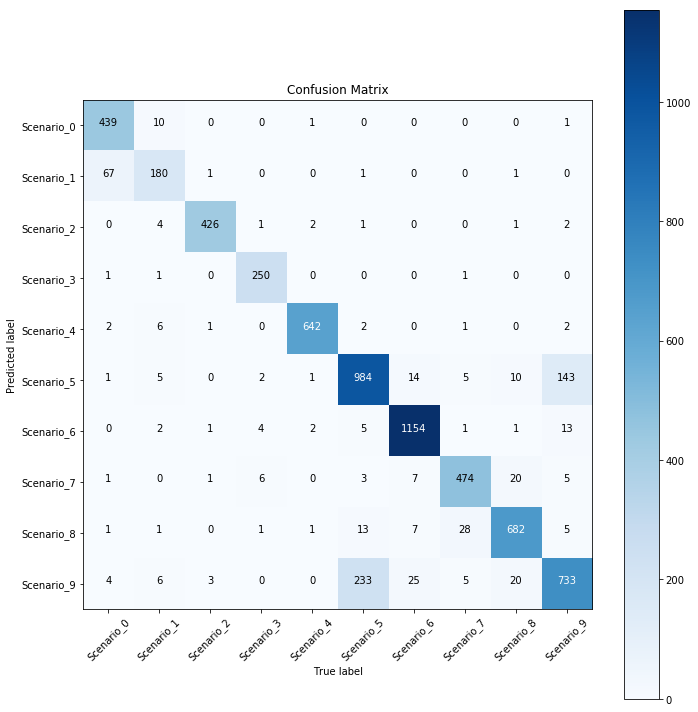

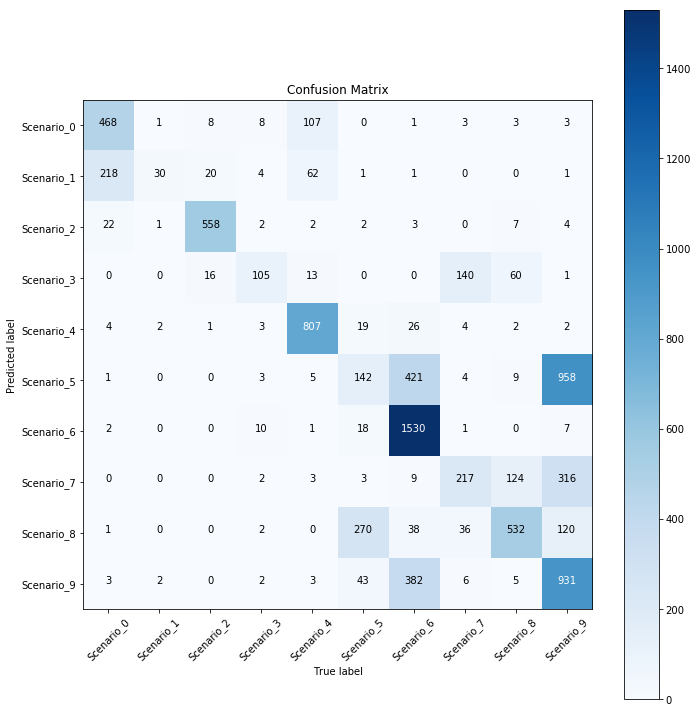

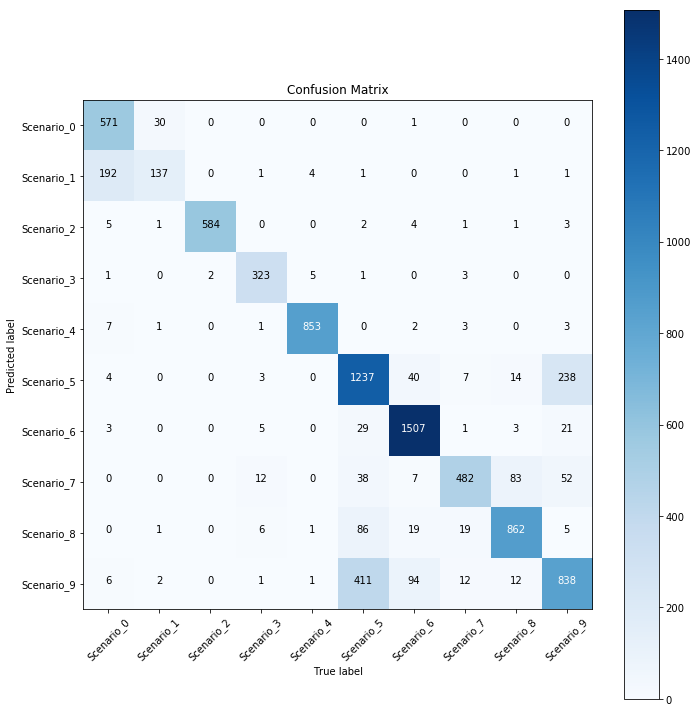

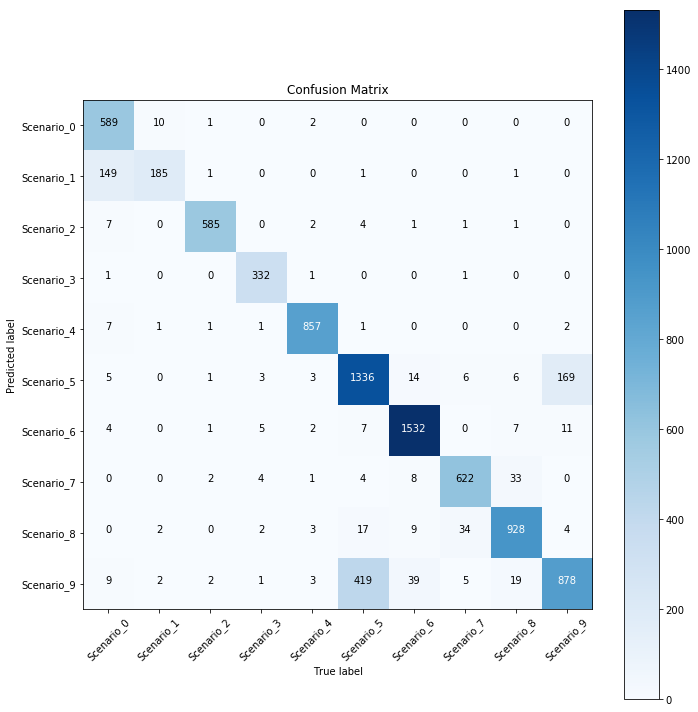

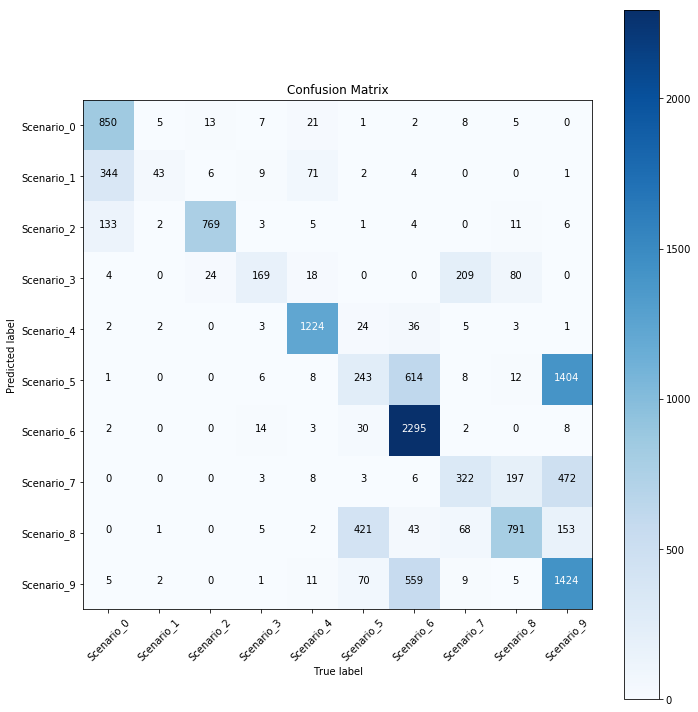

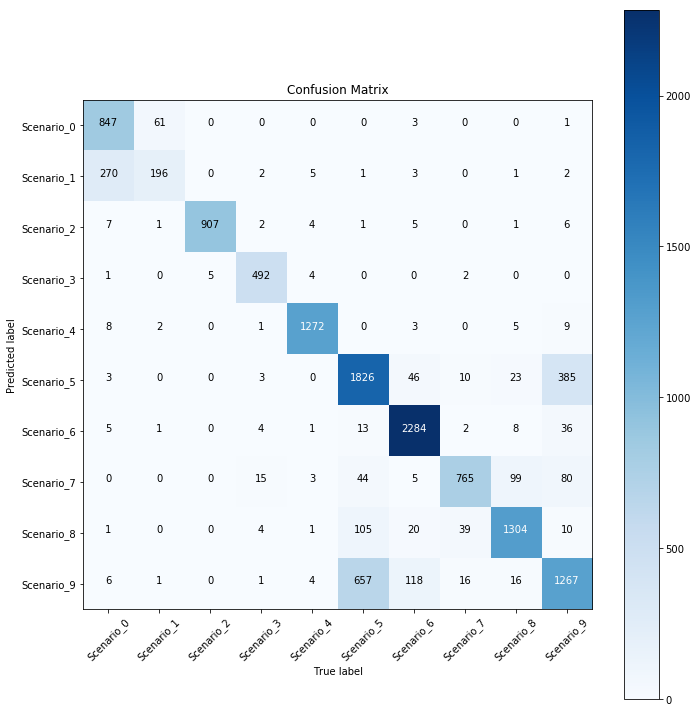

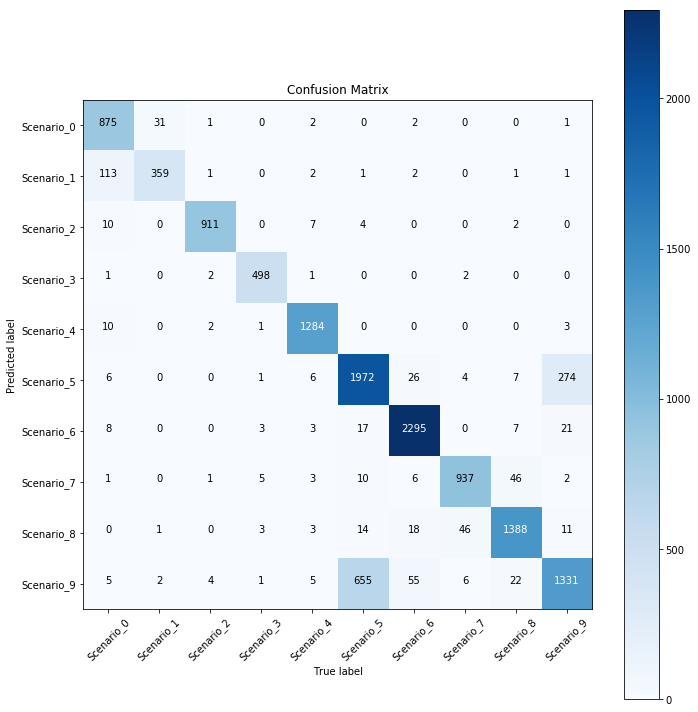

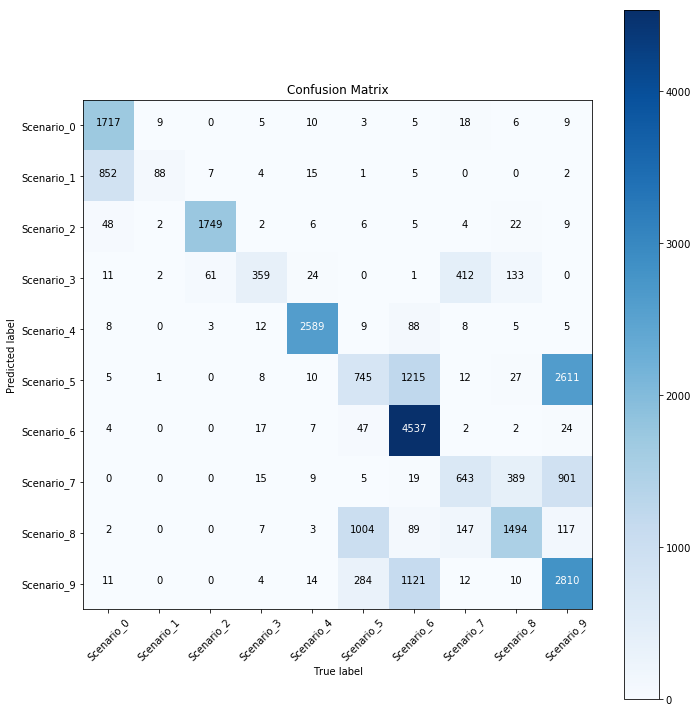

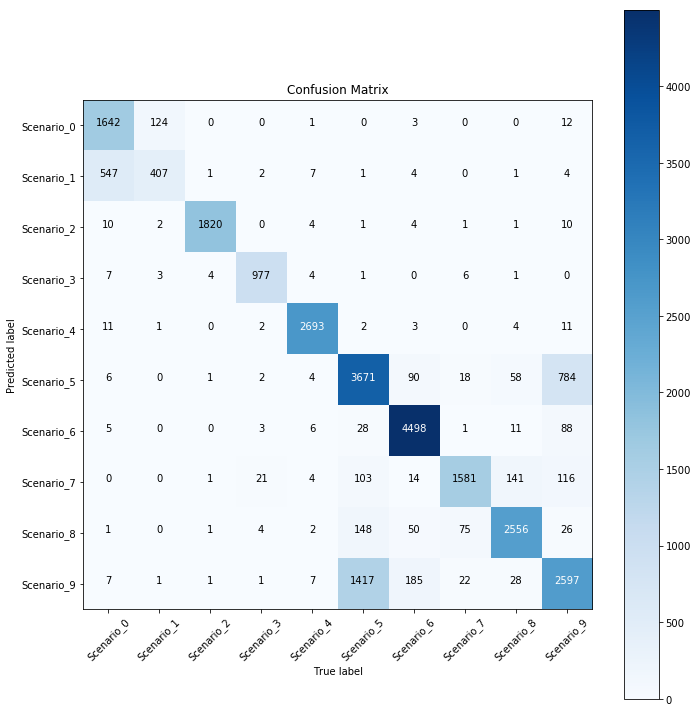

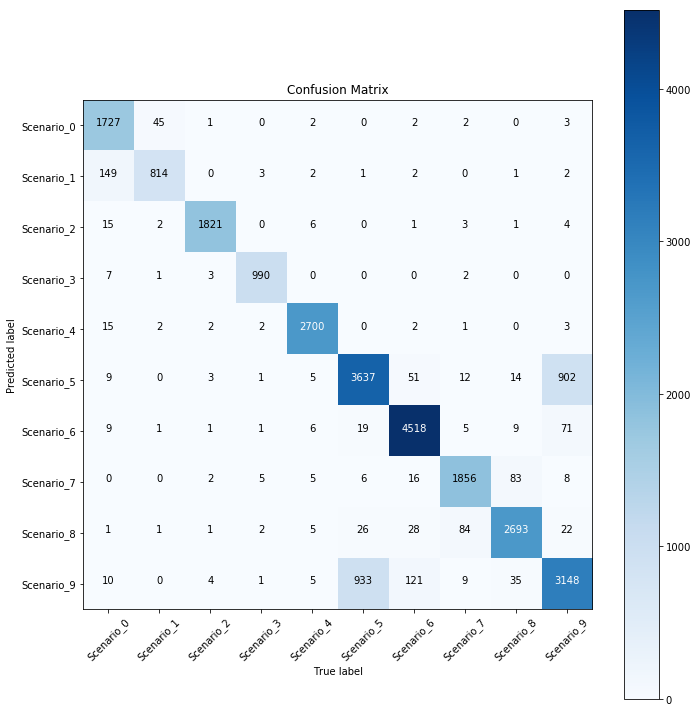

In [45]:
setup_dataset.compute_cm(y_test, svc_pred_scaled, svc_c)

In [74]:
for line in svc_accs :
    print(line)
print("====================") 
for line in svc_accs_scaled:
    print(line)

[0.79895209580838322, 0.80943113772455089, 0.80943113772455089]
[0.81127203323228925, 0.82148871673964297, 0.82148871673964297]
[0.82793204101489415, 0.83376992740064371, 0.83332085921712451]
[0.85533061407776068, 0.86139280769374693, 0.86210380571043665]
[0.58143712574850304, 0.82949101796407188, 0.89281437125748508]
[0.59728303581452791, 0.83013360278432691, 0.88065566408442797]
[0.60848738866851282, 0.83526682134570762, 0.88690966245041536]
[0.62608988511768893, 0.83980092055532685, 0.89451034689219022]


In [105]:
for line in svc_accs :
    print(line)
print("====================") 
for line in svc_accs_scaled:
    print(line)

[0.79895209580838322, 0.80943113772455089, 0.80943113772455089]
[0.81127203323228925, 0.82148871673964297, 0.82148871673964297]
[0.82793204101489415, 0.83376992740064371, 0.83332085921712451]
[0.85533061407776068, 0.86139280769374693, 0.86210380571043665]
[0.58143712574850304, 0.82949101796407188, 0.89281437125748508]
[0.59728303581452791, 0.83013360278432691, 0.88065566408442797]
[0.60848738866851282, 0.83526682134570762, 0.88690966245041536]
[0.62608988511768893, 0.83980092055532685, 0.89451034689219022]


In [ ]:
# THIS MAKES THE KERNEL CRASH!
rfc_list, rfc_accs, rfc_pred, rfc_pred_times, rfc_fit_times = \
setup_dataset.run_random_forest(X_train, X_test, y_train, y_test, rfc_c, rfc_jobs)

In [ ]:
rfc_list_scaled, rfc_accs_scaled, rfc_pred_scaled, rfc_pred_times_scaled, rfc_fit_times_scaled = \
setup_dataset.run_random_forest(X_train_scaled, X_test_scaled, y_train, y_test, rfc_c, rfc_jobs)

In [ ]:
setup_dataset.compute_cm(y_test, rfc_pred, rfc_c)

In [ ]:
setup_dataset.compute_cm(y_test, rfc_pred_scaled, rfc_c)

In [ ]:
gpc_list, gpc_accs, gpc_pred, gpc_pred_times, gpc_fit_times = \
setup_dataset.run_gaussian(X_train, X_test, y_train, y_test, gpc_c, gpc_jobs)

In [ ]:
gpc_list_scaled, gpc_accs_scaled, gpc_pred_scaled, gpc_pred_times_scaled, gpc_fit_times_scaled = \
setup_dataset.run_gaussian(X_train_scaled, X_test_scaled, y_train, y_test, gpc_c, rfc_jobs)

In [ ]:
setup_dataset.compute_cm(y_test, gpc_pred, gpc_c)

In [ ]:
setup_dataset.compute_cm(y_test, gpc_pred_scaled, gpc_c)

# Placeholder for small graph

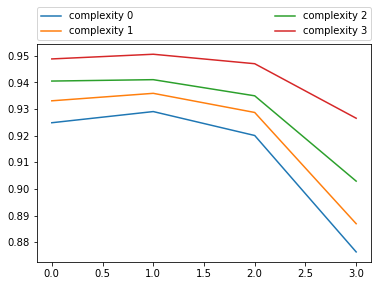

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
x = np.arange(len(knn_accs[0]))
y = [[] for _ in range(len(knn_accs[0]))]
for i in range(len(knn_accs[0])):
    y[i] = knn_accs[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

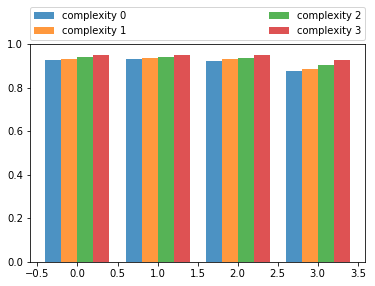

In [132]:
plt.figure()
x = np.arange(len(knn_accs[0]))
y = [[] for _ in range(len(knn_accs[0]))]
width = 0.2
for i in range(len(knn_accs[0])):
    y[i] = knn_accs[i]
    plt.bar(x- 1.5*width + width*i, y[i], width, align='center', label="complexity {}".format(i), alpha=0.8)
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

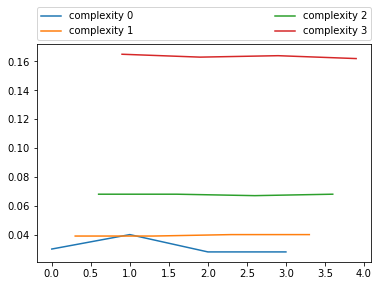

In [123]:
plt.figure()
x = np.arange(len(knn_fit_times[0]))
y = [[] for _ in range(len(knn_fit_times[0]))]
for i in range(len(knn_fit_times[0])):
    y[i] = knn_fit_times[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

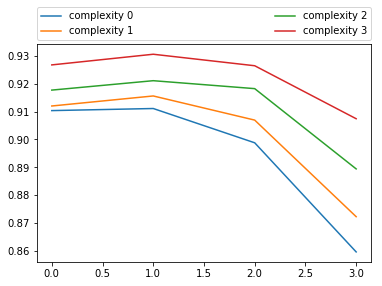

In [51]:
plt.figure()
x = np.arange(len(knn_accs_scaled[0]))
y = [[] for _ in range(len(knn_accs_scaled[0]))]
for i in range(len(knn_accs_scaled[0])):
    y[i] = knn_accs_scaled[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

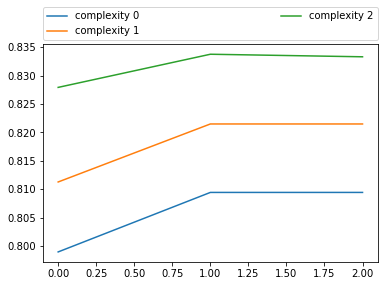

In [52]:
plt.figure()
x = np.arange(len(svc_accs[0]))
y = [[] for _ in range(len(svc_accs[0]))]
for i in range(len(svc_accs[0])):
    y[i] = svc_accs[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

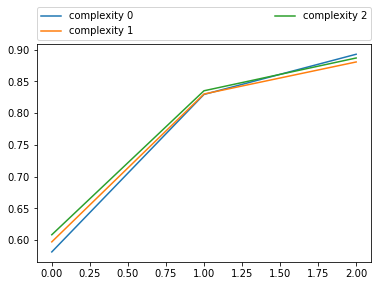

In [53]:
plt.figure()
x = np.arange(len(svc_accs_scaled[0]))
y = [[] for _ in range(len(svc_accs_scaled[0]))]
for i in range(len(svc_accs_scaled[0])):
    y[i] = svc_accs_scaled[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

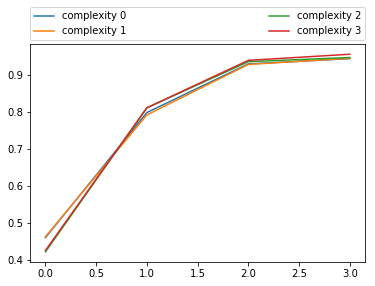

In [59]:
plt.figure()
x = np.arange(len(dtc_accs_scaled[0]))
y = [[] for _ in range(len(dtc_accs_scaled[0]))]
for i in range(len(dtc_accs_scaled[0])):
    y[i] = dtc_accs_scaled[i]
    plt.plot(x, y[i], linestyle='-', label="complexity {}".format(i))
    # plt.scatter(x, y[i], label="data {}".format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [60]:
for line in dtc_accs :
    print(line)
print("====================") 
for line in dtc_accs_scaled:
    print(line)

[0.46017964071856288, 0.79730538922155691, 0.92769461077844306, 0.94041916167664674]
[0.46266981026159198, 0.79117547995958237, 0.92848321544852364, 0.94431346132255534]
[0.42204924781079262, 0.8107926053439114, 0.93548387096774188, 0.9480577801062795]
[0.42656138906559893, 0.81184747221494591, 0.9391909590989036, 0.95625491149945741]
[0.46047904191616768, 0.79775449101796403, 0.92889221556886226, 0.94311377245508987]
[0.46278208150892558, 0.79128775120691586, 0.92747277422252161, 0.94408891882788815]
[0.4219744031135394, 0.81041838185764536, 0.93488511338971636, 0.94626150737220271]
[0.4257755491524155, 0.81053773902630688, 0.938442540133967, 0.95494517831081838]


# Saving the models to disk

We choose the models with a  good performance, and we save the models to disk in order to use them in a live implementation. For this, we are going to use the "pickle" library that allows us to dump the model into a file. 

Based on the results recorded in this notebook, we are going to save the following models:
* k-nearest neighbors, not staled, with the whole data set and 4 neighbors
* decision tree, not staled, with whole data set and depth=50
* Support vector classifier, scaled, with whole data and a RBF kernel complexity of 1e6

In [68]:
import pickle

In [102]:
pickle.dump(knn_list[3][1], open('../weights/knn_full_data_set_4_neighbors.sav', 'wb'))
pickle.dump(dtc_list[3][3], open('../weights/dtc_full_data_set_depth_50.sav', 'wb'))
pickle.dump(svc_list_scaled[3][2], open('../weights/svc_full_data_set_rbf_1e6.sav', 'wb'))

The same can be done without additional dependencies using _joblib_, which is shipped with scikit-learn. This has the advantage of being able to take either a file object or just the path to the file as an argument

In [80]:
from sklearn.externals import joblib

In [85]:
joblib.dump(knn_list[3][1], '../weights/knn_full_data_set_4_neighbors.pkl')
joblib.dump(dtc_list[3][3], '../weights/dtc_full_data_set_depth_50.pkl')
joblib.dump(svc_list_scaled[3][2], '../weights/svc_full_data_set_rbf_1e6.pkl')

['../weights/svc_full_data_set_rbf_1e6.pkl']

Joblib works wonders with sklearn, as well as with numpy arrays in general. For general purposes they both do their job just fine (as joblib uses pickle in the background), but [joblib can be significantly faster](https://gist.github.com/vsoch/61a82e7c920468325ea8)
 

# Checking the validity of the saved models

Now we just want to double-check that the models that we just saved are according to the values that we saw just after the learning process, and before savind the model persistance. In order to do this, we just load the model into a new variable from the saved file, and check for the accuracy of the new model using the same test set

First, remember that our X_train, X_test, y_train and y_test has been sliced in order to simulate data sets of variable lenghts. So, we take the largest as it demostrated to provide better results in this case:

In [109]:
X_test_large = X_test[3]
X_test_scaled_large = X_test_scaled[3]
y_test_large = y_test[3]

In [110]:
knn_saved = pickle.load(open('../weights/knn_full_data_set_4_neighbors.sav', 'rb'))
dtc_saved = pickle.load(open('../weights/dtc_full_data_set_depth_50.sav', 'rb'))
svc_saved = pickle.load(open('../weights/svc_full_data_set_rbf_1e6.sav', 'rb'))

print("The score achieved with the saved model is:\n")
print("K-nearest Neighbors =", knn_saved.score(X_test_large, y_test_large))
print("Decision Tree =", dtc_saved.score(X_test_large,y_test_large))
print("Support Vector Machine =", svc_saved.score(X_test_scaled_large,y_test_large))

The score achieved with the saved model is:

K-nearest Neighbors = 0.950566927366
Decision Tree = 0.955581334431
Support Vector Machine = 0.894510346892


In [111]:
knn_saved = joblib.load('../weights/knn_full_data_set_4_neighbors.pkl')
dtc_saved = joblib.load('../weights/dtc_full_data_set_depth_50.pkl')
svc_saved = joblib.load('../weights/svc_full_data_set_rbf_1e6.pkl')

result = knn_saved.score(X_test_large,y_test_large)
print("The score achieved with the saved model is:\n")
print("K-nearest Neighbors =", knn_saved.score(X_test_large, y_test_large))
print("Decision Tree =", dtc_saved.score(X_test_large,y_test_large))
print("Support Vector Machine =", svc_saved.score(X_test_scaled_large,y_test_large))

The score achieved with the saved model is:

K-nearest Neighbors = 0.950566927366
Decision Tree = 0.955581334431
Support Vector Machine = 0.894510346892
